---
# <div align="center"><font color='green'> COSC 2673/2793 |  Machine Learning | Assignment 2 </font></div>
## <div align="center"> <font color='red'> Student Name:  Devmi Shalini Perera Attapattuge                            </font></div>
## <div align="center"> <font color='red'> Student number:  s4073541                         </font></div>
## <div align="center"> <font color='red'> Student Name:  Vishini Harithya Boda Hennedi                          </font></div>
## <div align="center"> <font color='red'> Student number:  s4072225                     </font></div>
---

# Problem statement

The goal of this project is to develop a machine learning system that can classify histopathelogy images of colon cells and expect to use the dataset to perform two tasks which are classify images according to whether given cell image represents a cancerous cells
or not (isCancerous) and classify images according to cell-type, such as: fibroblast, inflammatory, epithelial or others.

To achieve this goal, the following steps will be performed:

- Exploratory Data Analysis (EDA) to understand image characteristics and class distributions.
- Pre-processing the data through normalization, resizing, and proper formatting for neural networks.
- Experimenting with different CNN architectures to identify effective methods for both classification tasks.
- Evaluation of the model using appropriate metrics like accuracy, precision, recall, and F1-score.
- Selecting the most suitable techniques and applying them to solve both classification problems.
- Analyzing model output to assess prediction quality and identify areas for improvement.
- Providing a final judgment on the best-performing models for clinical application.

The two given datasets consists of,

1. Cancer Detection Dataset: Images labeled as cancerous (1) or non-cancerous (0)
2. Cell Type Dataset: Images categorized by cell type

## Data Splitting, and EDA

First let's import the packages that will be necessary for loading and analysis of the dataset.

In [229]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_style('darkgrid')
import warnings
import tensorflow as tf
import zipfile
from sklearn.model_selection import train_test_split
from PIL import Image
import tensorflow.keras.backend as K
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
warnings.filterwarnings('ignore')


In [7]:
with zipfile.ZipFile('./Image_classification_data.zip', 'r') as zip_ref:
    zip_ref.extractall('./')

In [81]:
#loading and combining datasets
main_data = pd.read_csv('data_labels_mainData.csv')
extra_data = pd.read_csv('data_labels_extraData.csv')

#combined only to be used in cancer detection
combined_data = pd.concat([main_data,extra_data],axis = 0)

In [83]:
base_dir = 'patch_images/'
combined_data['ImagePath'] = combined_data['ImageName'].apply(lambda x : base_dir + x)
combined_data.head()

,InstanceID,patientID,ImageName,cellTypeName,cellType,isCancerous,ImagePath
0,22405,1,22405.png,fibroblast,0.0,0,patch_images/22405.png
1,22406,1,22406.png,fibroblast,0.0,0,patch_images/22406.png
2,22407,1,22407.png,fibroblast,0.0,0,patch_images/22407.png
3,22408,1,22408.png,fibroblast,0.0,0,patch_images/22408.png
4,22409,1,22409.png,fibroblast,0.0,0,patch_images/22409.png


## Exploratory Data Analysis (EDA)

In [23]:
main_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9896 entries, 0 to 9895
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   InstanceID    9896 non-null   int64 
 1   patientID     9896 non-null   int64 
 2   ImageName     9896 non-null   object
 3   cellTypeName  9896 non-null   object
 4   cellType      9896 non-null   int64 
 5   isCancerous   9896 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 464.0+ KB


In [25]:
extra_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10384 entries, 0 to 10383
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   InstanceID   10384 non-null  int64 
 1   patientID    10384 non-null  int64 
 2   ImageName    10384 non-null  object
 3   isCancerous  10384 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 324.6+ KB


In [27]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20280 entries, 0 to 10383
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   InstanceID    20280 non-null  int64  
 1   patientID     20280 non-null  int64  
 2   ImageName     20280 non-null  object 
 3   cellTypeName  9896 non-null   object 
 4   cellType      9896 non-null   float64
 5   isCancerous   20280 non-null  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 1.1+ MB


In [71]:
print('No of patients in the entire dataset: {}'.format(len(combined_data['patientID'].unique())))

No of patients in the entire dataset: 98


> <span style="font-size:1em;">✔</span> **Observations:**

> - main_data dataset contains 9,896 records with 6 columns, including cellTypeName and cellType information.
> - extra_data dataset includes 10,384 records, but lacks cellTypeName and cellType attributes.
> - The merged combined_data dataset has 20,280 records, combining both datasets. It was noticed that only 9,896 records (from main_data) have valid cellTypeName and cellType values and the rest are missing (NaN) in those columns.
> - In total, there are 98 unique patients across the entire dataset, based on the patientID column.

### Data Distribution - Cell Type

In [73]:
## This functions plots the class distribution graphs.

def plot_class_distribution(df, column, title, color="skyblue"):
 
    if column not in df.columns:
        raise ValueError(f"Column '{column}' not found in DataFrame.")
    
    # Calculate class distribution
    class_dist = df[column].value_counts(normalize=True) * 100
    
    # Plot
    fig, ax = plt.subplots(figsize=(8, 5))
    class_dist.plot(kind='bar', color=color, ax=ax)

    ax.set_ylabel('Percentage')
    ax.set_title(title)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    
    plt.tight_layout()
    plt.show()

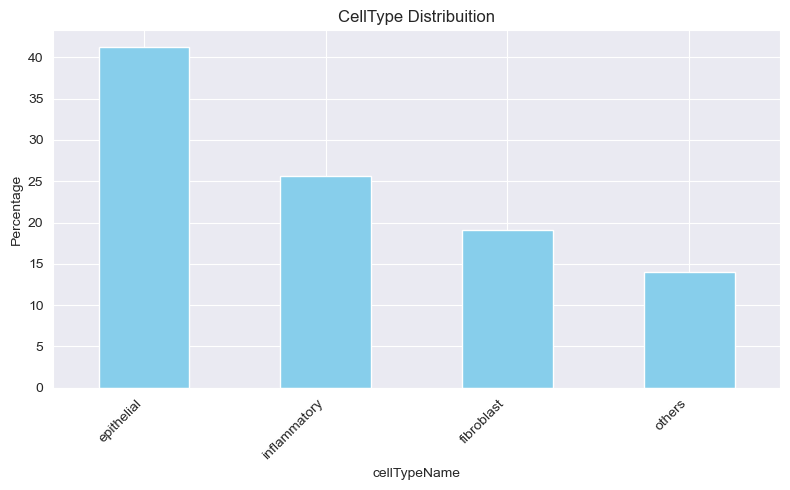

In [77]:
# cell type distribution
plot_class_distribution(combined_data, 'cellTypeName', "CellType Distribuition", color="skyblue")

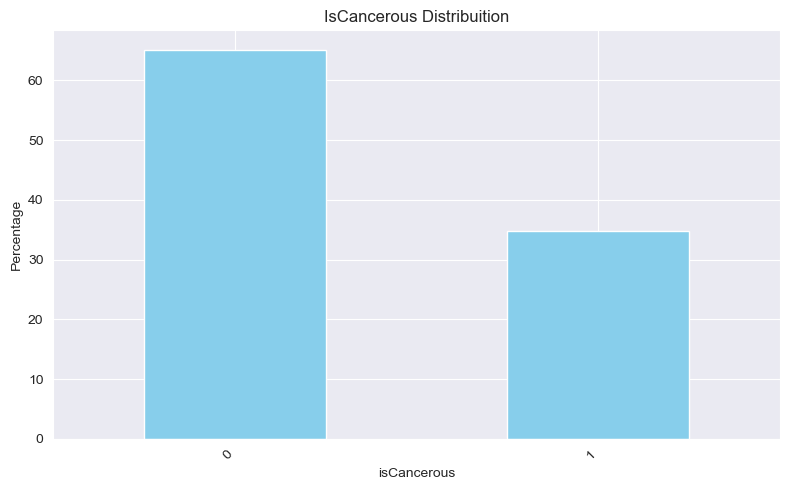

In [79]:
# IsCancer distribution
plot_class_distribution(combined_data, 'isCancerous', "IsCancerous Distribuition", color="skyblue")

> <span style="font-size:1em;">✔</span> **Observations:**

> - The data has 4 distinct classes, once again confirming a multi-class classification. On inspection, there is a clear imbalance in the distribution—certain classes have significantly more samples than others. This will cause the model to be biased towards the majority classes, , leading to poor performance on underrepresented classes.
> - In the binary classification case, with only 2 classes, the distribution is again imbalanced, with one class having a notably higher frequency than the other. A model trained on this data may yield misleadingly high accuracy, while underperforming on the minority class.
> - Because of the class imbalance in both cases, we will take the F1 score as the primary evaluation metric. Unlike accuracy, the F1 score provides a balanced view by considering both recall and precision and is therefore more appropriate for imbalanced datasets.

In [85]:
fibroblast, inflammatory, epithelial, others = [combined_data[combined_data['cellType'] == i].sample(4) for i in range(4)]


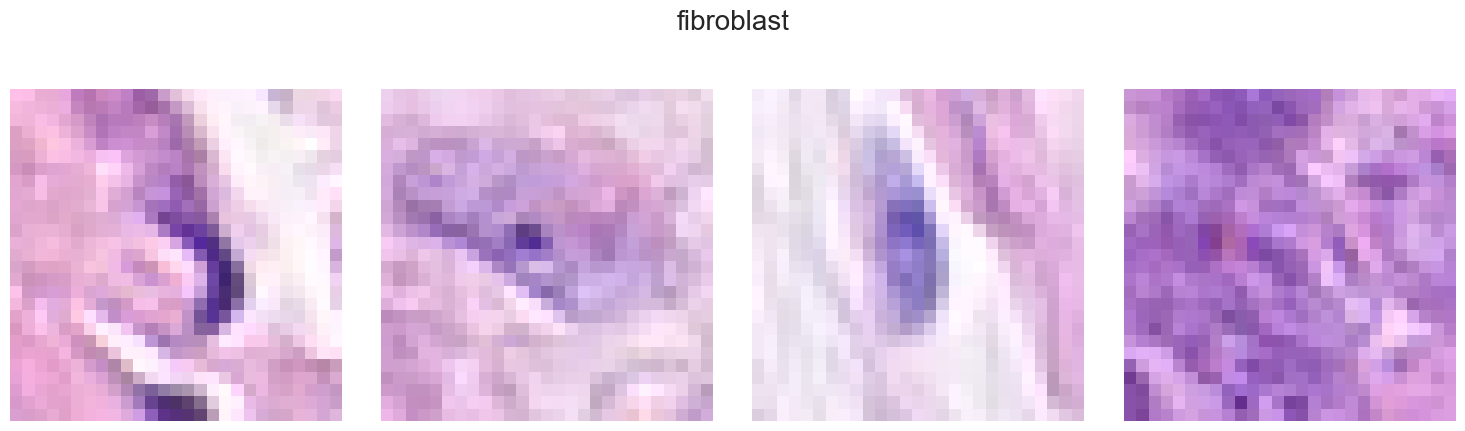

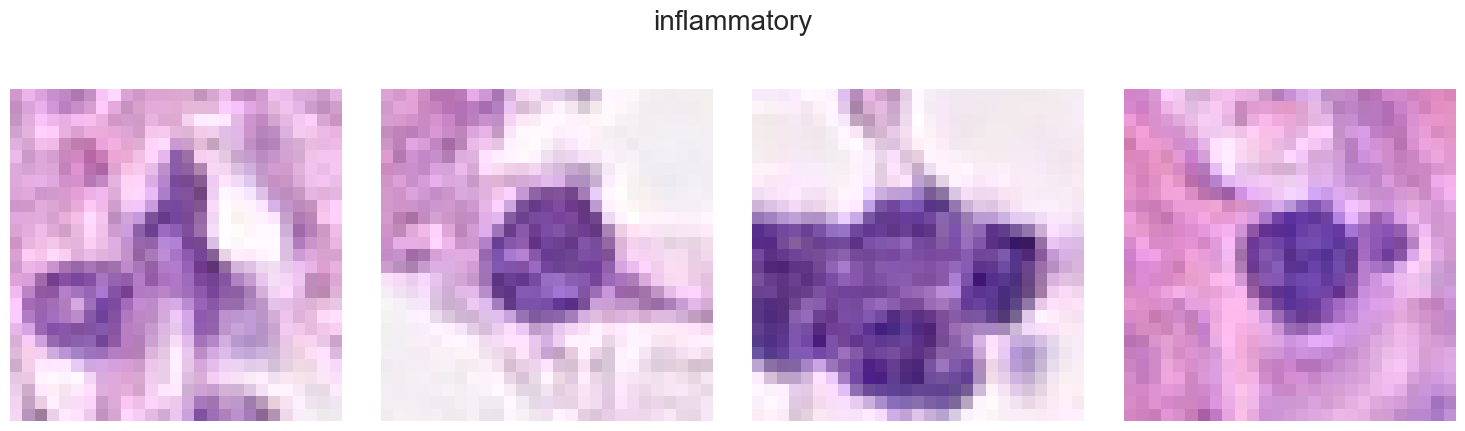

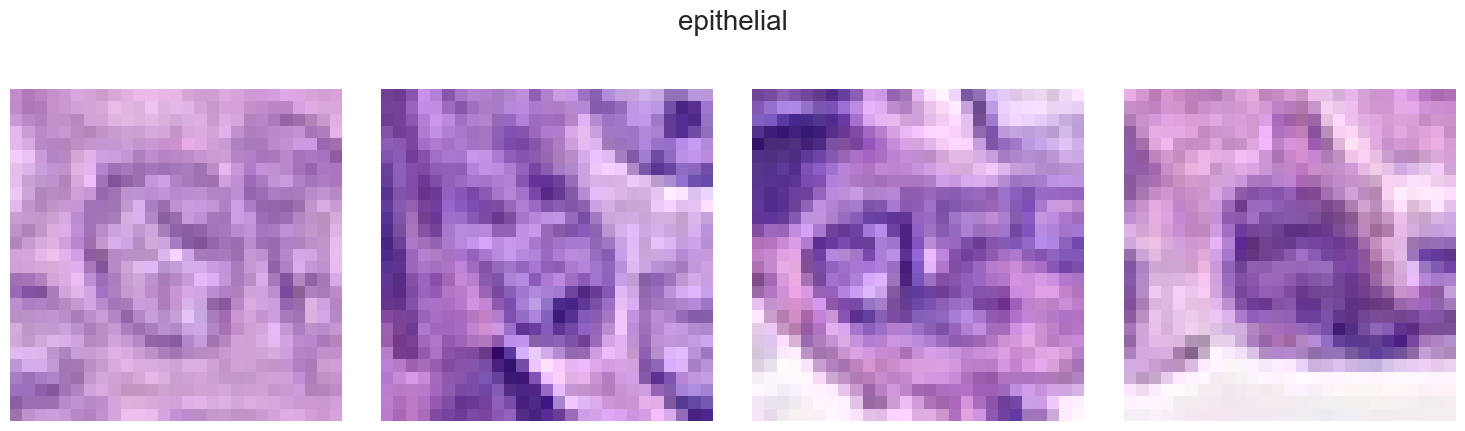

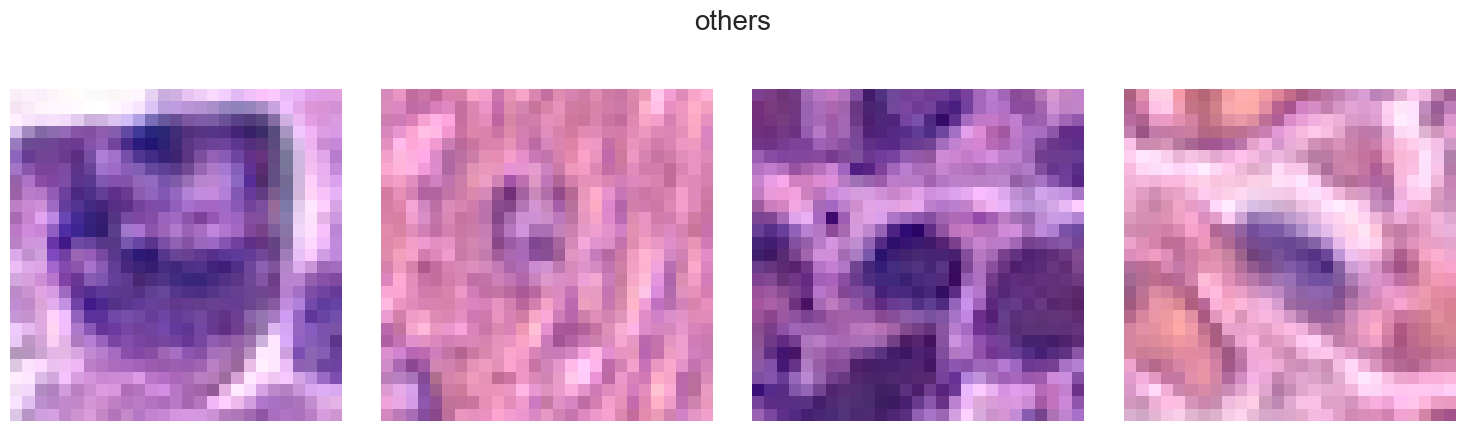

In [93]:
def plot_images(df,title):
  fig = plt.figure(figsize = (15,8))
  for i, img in enumerate(df):
    fig.add_subplot(2,4,i+1)
    plt.imshow(Image.open(img))
    plt.axis('off')
    fig.suptitle(title, fontsize = 20) 
  plt.tight_layout(rect = [0, 0.03, 1, 0.95])
  return plt.show()
img_labels = [fibroblast,inflammatory,epithelial,others]
for labels in img_labels:
  label = str(labels['cellTypeName'].iloc[0])
  plot_images(labels['ImagePath'],label)



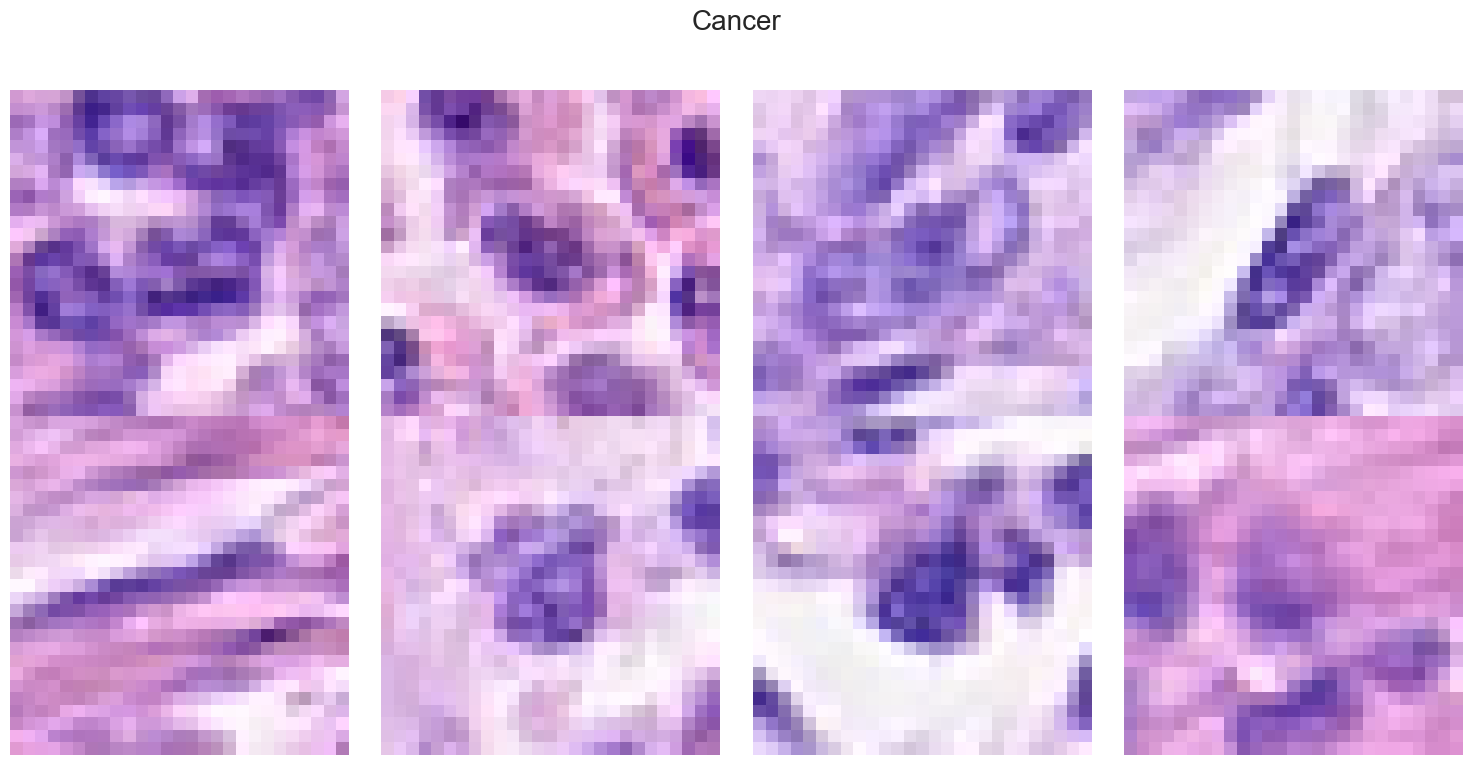

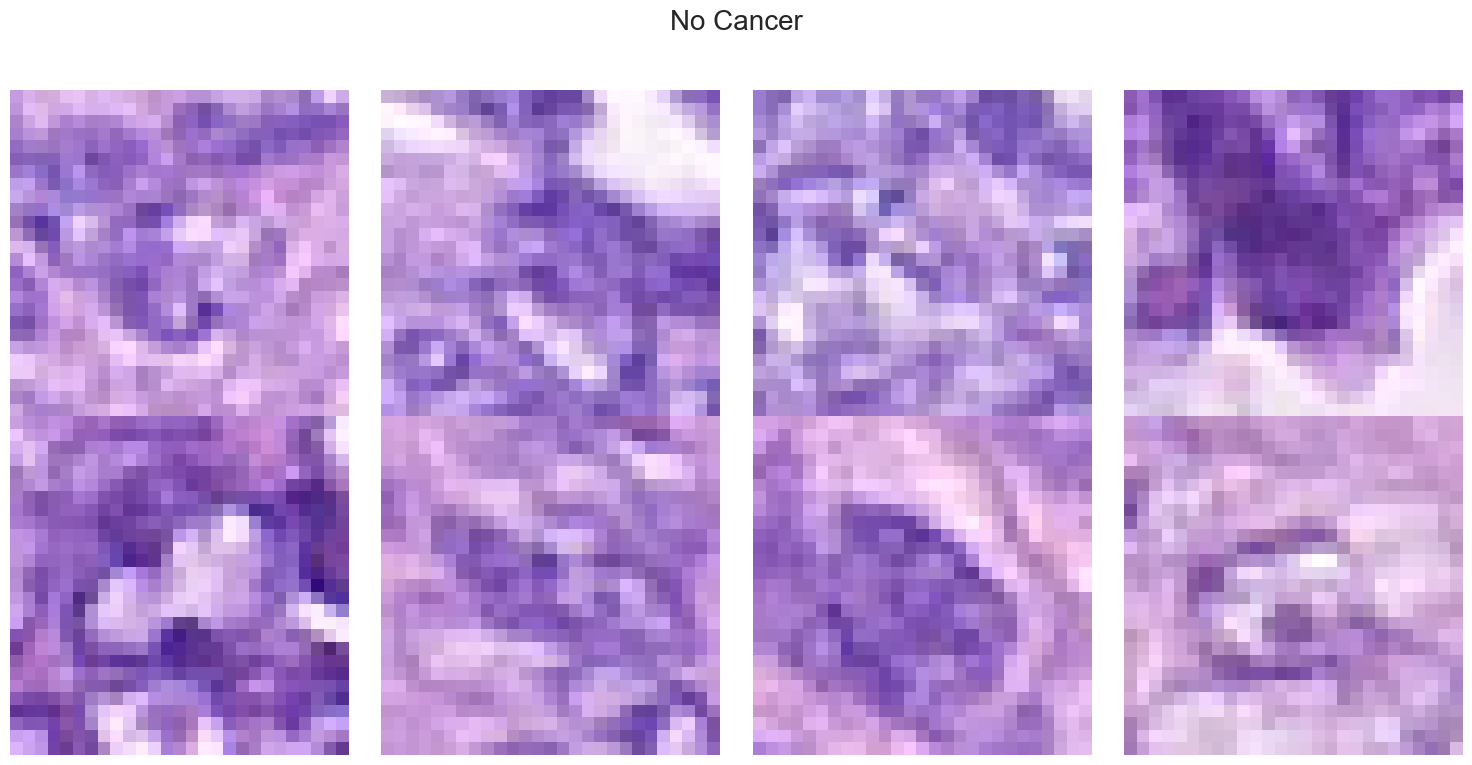

In [97]:
cancer = combined_data.loc[combined_data['isCancerous']==1].sample(8)
not_cancer = combined_data.loc[combined_data['isCancerous']==0].sample(8)

isCancerous = [not_cancer,cancer]
can_label  = ['Cancer','No Cancer']
for i, labels in enumerate(isCancerous):
  plot_images(labels['ImagePath'],can_label[i])

> <span style="font-size:1em;">✔</span> **Observations:**

> - Each cell category presents distinct visual features that aid in classification. Fibroblast cells appear elongated with less densely stained nuclei, while inflammatory cells are smaller, darker, and often clustered together. Epithelial cells exhibit round shapes with well-defined nuclei and clear boundaries. The "Others" category includes cells with ambiguous or uncommon appearances.
> -  Cancerous images are characterized by higher cellular density, irregular nuclear shapes, and disorganized tissue architecture where normal structural patterns are disrupted. In contrast, non-cancerous images display more uniform cell morphology, fewer overlapping structures, and clearer background separation, making individual cells easier to distinguish and analyze.
 > -  Blur: Significant number of images suffer from visual blur due to poor slide preparation, camera focus errors reducing clarity of cell boundaries and nuclear features.
 > -  Occlusion: Multiple cells overlapping or partially hidden in samples.
 > -  Embedded Text where no embedded labels, scale bars, or text markers observed in samples (positive finding - eliminates potential confounding factors).

## Data Splitting

Train: 80%, Test: 20% split is a common split percentages that works well for many machine learning problems, offering a good balance between training the model and testing its generalization.

In [55]:
def split_data(data):

    #  Split based on unique patient IDs for train and test
    unique_patients = data['patientID'].unique()
    
    # First split: 80% train_val, 20% test
    train_val_patients, test_patients = train_test_split(
        unique_patients, test_size=0.2, random_state=42
    )
    
    # Filter the full dataset based on patient IDs
    train_val_data = data[data['patientID'].isin(train_val_patients)]
    test_data = data[data['patientID'].isin(test_patients)]
    
    # From train_val, split 80% train, 20% validation
    train_patients, val_patients = train_test_split(
        train_val_patients, test_size=0.2, random_state=42
    )
    
    train_data = data[data['patientID'].isin(train_patients)]
    val_data = combined_data[combined_data['patientID'].isin(val_patients)]
     
    
    print("Train data : {}, Val Data: {}, Test Data: {}".format(train_data.shape[0], val_data.shape[0], test_data.shape[0]))
    return test_data, train_data,val_data

In [57]:
#split_data_for_cancer_classifier
test_data_cancer,train_data_cancer,val_data_cancer=split_data(combined_data)
#total number of records in each dataset equals the  main_data+extra_data.


Train data : 12319, Val Data: 4005, Test Data: 3956


In [59]:
#split_data_for_cell_type_classifier_full_supervised
test_data_cell,train_data_cell,val_data_cell=split_data(main_data)


Train data : 6215, Val Data: 1842, Test Data: 1839


In [63]:
def check_data_leakages(train_data,val_data,test_data):
    # Check for data leakages
    # Patient Ids should be uniqye in the 3 seperate datasets. Patient Ids cannot be overlapped between the datasets
    # Get sets of patient IDs in each split
    train_patients_set = set(train_data['patientID'])
    val_patients_set = set(val_data['patientID'])
    test_patients_set = set(test_data['patientID'])
    
    # Check for overlaps
    leak_train_val = train_patients_set.intersection(val_patients_set)
    leak_train_test = train_patients_set.intersection(test_patients_set)
    leak_val_test = val_patients_set.intersection(test_patients_set)
    
    # Print results
    print("Patients in both train and val:", leak_train_val)
    print("Patients in both train and test:", leak_train_test)
    print("Patients in both val and test:", leak_val_test)
    
    # no data leakages. 
        

In [65]:
#checking_data_leakages_for_cancer_data_split
check_data_leakages(train_data_cancer,val_data_cancer,test_data_cancer)

Patients in both train and val: set()
Patients in both train and test: set()
Patients in both val and test: set()


In [67]:
#checking_data_leakages_for_cell_data_split
check_data_leakages(train_data_cell,val_data_cell,test_data_cell)

Patients in both train and val: set()
Patients in both train and test: set()
Patients in both val and test: set()


> <span style="font-size:1em;">✔</span> **Observations:**

> - Patient IDs were used to ensure strict partitioning across training, validation, and test sets. After splitting, we confirmed there were no overlapping patient IDs between any two sets (train/val/test). This guarantees no data leakage, ensuring the integrity of model evaluation.
> - The total number of records across all three datasets adds up exactly to the original dataset size where  train set consist of 12319, Validation set with 4005 andtTest set with 3956.
Total is 20280, which matches the expected number of records from main_data + extra_data. This confirms that the data split process preserved all records without loss or duplication.

### EDA result Analysis and deriven conclusion

- Combined dataset contains 20,280 medical images from 98 unique patients across two sources.
- Mixed labeled/unlabeled structure creates opportunity for semi-supervised learning approaches.
- Multi-class classification (4 cell types) shows significant class imbalance with certain types overrepresented.
- Binary classification (cancer vs. non-cancer) also exhibits notable imbalance favoring one class.
- Imbalanced distribution necessitates F1-score as primary evaluation metric instead of accuracy to ensure balanced assessment of precision and recall.
- Patient-level data splitting successfully implemented with no patient ID overlap between train (12,319), validation (4,005), and test (3,956) sets.
- Zero data leakage confirmed, ensuring robust model evaluation integrity.


## Data Pre- Processing

Our preprocessing pipeline prepares medical images for cancer detection and cell type classification.

In [101]:
#Changing target variables data type to str for ImageDataGenerator
train_data_cancer['isCancerous'] = train_data_cancer['isCancerous'].astype('str')
val_data_cancer['isCancerous'] = val_data_cancer['isCancerous'].astype('str')
test_data_cancer['isCancerous'] = test_data_cancer['isCancerous'].astype('str')

train_data_cell['cellType'] = train_data_cell['cellType'].astype('str')
val_data_cell['cellType'] = val_data_cell['cellType'].astype('str')
test_data_cell['cellType'] = test_data_cell['cellType'].astype('str')

In [411]:
def image_data_generator(train_data, val_data, test_data, x_column, y_column, target_size=(28, 28), batch_size=32):
    datagen_args = dict(rescale=1./255, data_format='channels_last')
    
    train_datagen = ImageDataGenerator(**datagen_args)
    val_datagen = ImageDataGenerator(**datagen_args)
    test_datagen = ImageDataGenerator(**datagen_args)

    train_generator = train_datagen.flow_from_dataframe(
        dataframe=train_data,
        directory='patch_images/',
        x_col=x_column,
        y_col=y_column,
        target_size=target_size,
        batch_size=batch_size,
        class_mode='categorical'
    )

    validation_generator = val_datagen.flow_from_dataframe(
        dataframe=val_data,
        directory='patch_images/',
        x_col=x_column,
        y_col=y_column,
        target_size=target_size,
        batch_size=batch_size,
        class_mode='categorical'
    )

    test_generator = test_datagen.flow_from_dataframe(
        dataframe=test_data,
        directory='patch_images/',
        x_col=x_column,
        y_col=y_column,
        target_size=target_size,
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=False
    )

    return train_generator, validation_generator, test_generator

In [390]:
#Images of Cancer/No cancer after processing
train_gen_can,val_gen_can,test_gen_can=image_data_generator(train_data_cancer,val_data_cancer,test_data_cancer,"ImageName","isCancerous")

Found 12319 validated image filenames belonging to 2 classes.
Found 4005 validated image filenames belonging to 2 classes.
Found 3956 validated image filenames belonging to 2 classes.


In [459]:
#Images of celltypes after processing
train_gen_cell,val_gen_cell,test_gen_cell=image_data_generator(train_data_cell,val_data_cell,test_data_cell,"ImageName","cellType")

Found 6215 validated image filenames belonging to 4 classes.
Found 1842 validated image filenames belonging to 4 classes.
Found 1839 validated image filenames belonging to 4 classes.


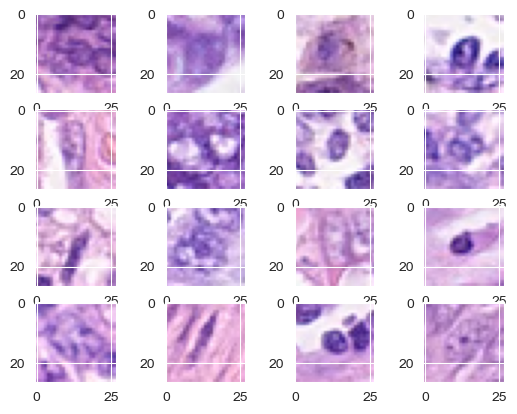

In [161]:
images, labels = next(train_gen_can)

#plt.figure(figsize= (15, 15))
for i in range(batch_size//2):
    plt.subplot(4, 4, i+1)
    plt.imshow(images[i])

plt.show()

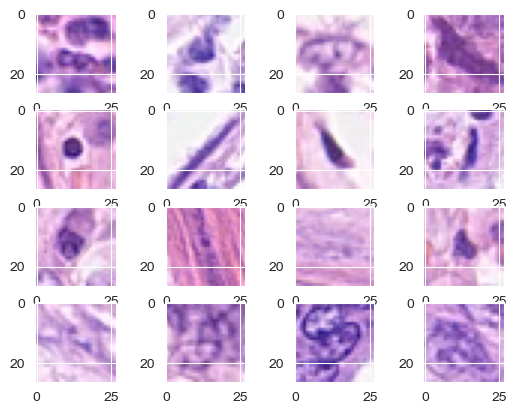

In [159]:
images, labels = next(train_gen_cell)

#plt.figure(figsize= (15, 15))
for i in range(batch_size//2):
    plt.subplot(4, 4, i+1)
    plt.imshow(images[i])

plt.show()

> <span style="font-size:1em;">✔</span> **Observations:**

> - Target variables converted to string format for compatibility with ImageDataGenerator (both 'isCancerous' and 'cellType' columns)
> - Images standardized to 28x28 pixel resolution to ensure consistent input dimensions across all samples
> - Pixel values normalized by rescaling to [0,1] range (dividing by 255) for improved model training stability
> - we create seperate generators created for binary cancer classification (12,319 train, 4,005 validation, 3,956 test images across 2 classes)
> - The Multi-class cell type classification subset uses only labeled data (6,215 train, 1,842 validation, 1,839 test images across 4 classes
> - Test generator configured with shuffle=False to maintain consistent evaluation order

### Performance Metrics Selection

F1-Score:

- Primary metric for both binary and multi-class classification due to severe class imbalance identified in EDA
- Provides balanced assessment by harmonically averaging precision and recall (F1 = 2 × (precision × recall) / (precision + recall))
- Particularly effective for imbalanced datasets where accuracy can be misleadingly high due to majority class bias

Precision:

- Measures true positive rate among predicted positives (TP / (TP + FP))

Recall (Sensitivity):

- Measures true positive rate among actual positives (TP / (TP + FN))

Accuracy:

- Overall correctness measure ((TP + TN) / (TP + TN + FP + FN))
- Although commonly used, accuracy can be misleading  and less reliable in imbalanced datasets as this can reflect the majority class performance while ignoring minority class errors.

Therefore, from among given metrics, F1-score is our primary metric for imbalanced classification problems due to its balance between precision and recall.

In [ ]:
train_gen_can,val_gen_can,test_gen_can

## Base Model 

The base model we chose is VGG architecture, as it works perfectly for advanced medical image classification tasks. This model model maintains RGB input (28x28x3) rather than converting to grayscale, preserving valuable color information. 
The VGG variant maintains spatial information through 'same' padding and includes paired convolutional layers within each block for more nuanced feature extraction.  
 This architecture effectively balances computational efficiency with classification performance, making it more suitable for critical medical imaging task where both accuracy and interpretability are essential factors.

### Base Model - VGG - IsCancerous Classifier

In [418]:
batch_size = 32
INPUT_DIM = (28,28,3)
OUTPUT_CLASSES = 2
model_VGG_1 = tf.keras.Sequential([
    #VGG block 1
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=INPUT_DIM),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    
    #VGG block 2
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    
    #VGG block 3
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(OUTPUT_CLASSES,activation='sigmoid')
])

In [420]:
model_VGG_1.summary()

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_78 (Conv2D)                   │ (None, 28, 28, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_79 (Conv2D)                   │ (None, 28, 28, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_39 (MaxPooling2D)      │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_80 (Conv2D)                   │ (None, 14, 14, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_81 (Conv2D)                   │ (None, 14, 14, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_40 (MaxPooling2D)      │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_82 (Conv2D)                   │ (None, 7, 7, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_83 (Conv2D)                   │ (None, 7, 7, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_41 (MaxPooling2D)      │ (None, 3, 3, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_13 (Flatten)                 │ (None, 1152)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_34 (Dense)                     │ (None, 256)                 │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_35 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_36 (Dense)                     │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 615,330 (2.35 MB)

 Trainable params: 615,330 (2.35 MB)

 Non-trainable params: 0 (0.00 B)

In [422]:
model_VGG_1.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
              metrics=['accuracy'])

In [424]:
base_model = model_VGG_1.fit(train_gen_can, validation_data = val_gen_can, epochs=10, verbose=1)

Epoch 1/10
385/385 ━━━━━━━━━━━━━━━━━━━━ 44s 99ms/step - accuracy: 0.7588 - loss: 0.4844 - val_accuracy: 0.8290 - val_loss: 0.3888
Epoch 2/10
385/385 ━━━━━━━━━━━━━━━━━━━━ 38s 99ms/step - accuracy: 0.8644 - loss: 0.3202 - val_accuracy: 0.8742 - val_loss: 0.2970
Epoch 3/10
385/385 ━━━━━━━━━━━━━━━━━━━━ 37s 96ms/step - accuracy: 0.8742 - loss: 0.2991 - val_accuracy: 0.8782 - val_loss: 0.2881
Epoch 4/10
385/385 ━━━━━━━━━━━━━━━━━━━━ 38s 99ms/step - accuracy: 0.8869 - loss: 0.2793 - val_accuracy: 0.8864 - val_loss: 0.2822
Epoch 5/10
385/385 ━━━━━━━━━━━━━━━━━━━━ 38s 98ms/step - accuracy: 0.8995 - loss: 0.2574 - val_accuracy: 0.8914 - val_loss: 0.2746
Epoch 6/10
385/385 ━━━━━━━━━━━━━━━━━━━━ 37s 96ms/step - accuracy: 0.9027 - loss: 0.2506 - val_accuracy: 0.8859 - val_loss: 0.2785
Epoch 7/10
385/385 ━━━━━━━━━━━━━━━━━━━━ 37s 97ms/step - accuracy: 0.9002 - loss: 0.2487 - val_accuracy: 0.8689 - val_loss: 0.3105
Epoch 8/10
385/385 ━━━━━━━━━━━━━━━━━━━━ 38s 99ms/step - accuracy: 0.9096 - loss: 0.2256 - 

In [430]:
import matplotlib.pyplot as plt

def plot_learning_curve(history, metrics=('accuracy',), title='Learning Curve'):
    plt.figure(figsize=(14, 5))

    #Plot loss
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Train Loss', marker='o')
    plt.plot(history.history['val_loss'], label='Val Loss', marker='o')
    plt.title(f'{title} - Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.grid(True)
    plt.legend()

    # --- Plot metrics ---
    plt.subplot(1, 2, 2)
    for metric in metrics:
        if metric in history.history:
            plt.plot(history.history[metric], label=f'Train {metric}', marker='o')
        if f'val_{metric}' in history.history:
            plt.plot(history.history[f'val_{metric}'], label=f'Val {metric}', marker='o')
    plt.title(f'{title} - Metrics')
    plt.xlabel('Epoch')
    plt.ylabel('Score')
    plt.grid(True)
    plt.legend()

    plt.tight_layout()
    plt.show()


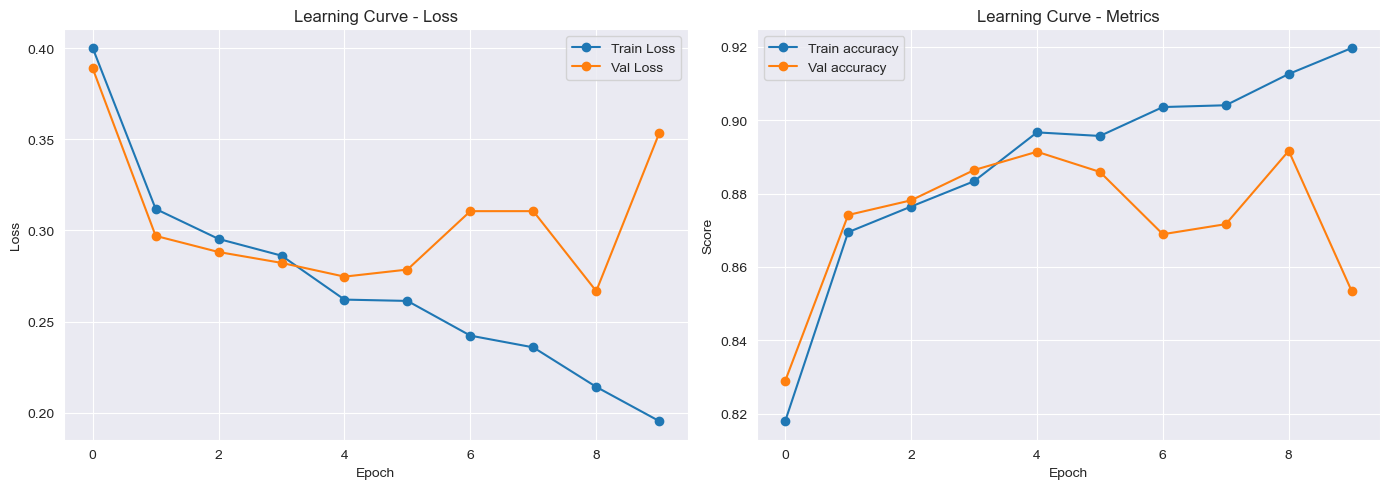

In [432]:
plot_learning_curve(base_model, metrics=('accuracy',), title='Learning Curve')

In [434]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils.class_weight import compute_class_weight
def model_evaluation(test_generator,model):
  # Predict the probabilities
  y_pred_probs = model.predict(test_generator, verbose=0)
  y_pred = np.argmax(y_pred_probs, axis=1)
  y_true = test_generator.classes

  # Class names
  class_names = list(test_generator.class_indices.keys())

  print("Classification Report for the model:")
  print(classification_report(y_true, y_pred, target_names=class_names))

  # Confusion matrix
  cm = confusion_matrix(y_true, y_pred)
  plt.figure(figsize=(8, 6))
  sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
  plt.xlabel('Predicted')
  plt.ylabel('True')
  plt.title('Confusion Matrix')

Classification Report for the model:
              precision    recall  f1-score   support

           0       0.94      0.88      0.91      2909
           1       0.71      0.85      0.78      1047

    accuracy                           0.87      3956
   macro avg       0.83      0.87      0.84      3956
weighted avg       0.88      0.87      0.87      3956



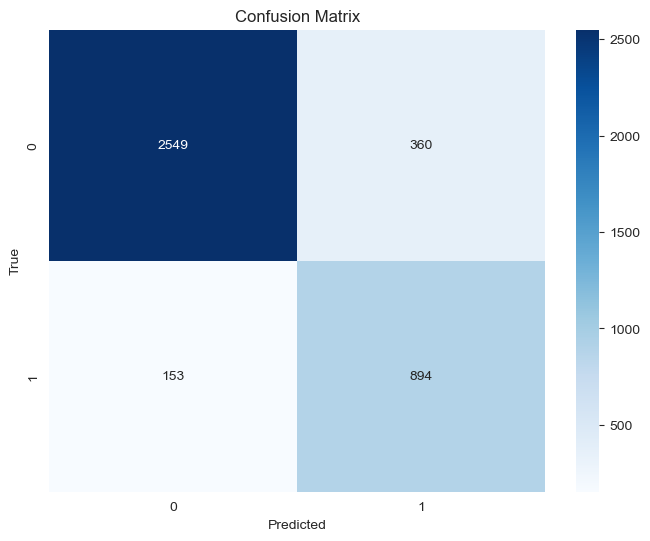

In [436]:
model_evaluation(test_gen_can, model_VGG_1)

In [ ]:
train_gen_cell,val_gen_cell,test_gen_cell

> <span style="font-size:1em;">✔</span> **Observations:**

> - The VGG model achieved 87%  accuracy on cancer classification.
> - Clear disparity between class metrics with non-cancerous samples (precision 0.94, F1=0.91) performing better than cancerous samples (precision 0.71, F1=0.78), indicating the model struggles more with the minority class.
> - The learning curves show training accuracy continuously increased to 92% while validation accuracy peaks at 89.16% (epoch 9) and then declines, suggesting overfitting beginning around epoch 5-6.
> - Higher recall (0.85) than precision (0.71) for cancerous samples shows the model prioritizes sensitivity over specificity, potentially leading to more false positives but fewer missed cancer cases.

### Base Model - CellType

In [461]:
batch_size = 32
INPUT_DIM = (28,28,3)
OUTPUT_CLASSES = 4 # num of classes 
model_VGG_1_Cell = tf.keras.Sequential([
    #VGG block 1
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=INPUT_DIM),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    
    #VGG block 2
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    
    #VGG block 3
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(OUTPUT_CLASSES,activation='softmax')
])

In [463]:
model_VGG_1_Cell.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

In [465]:
base_model_cell = model_VGG_1_Cell.fit(train_gen_cell, validation_data = val_gen_cell, epochs=10, verbose=1)

Epoch 1/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 25s 101ms/step - accuracy: 0.3690 - loss: 1.2945 - val_accuracy: 0.5527 - val_loss: 1.0837
Epoch 2/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 20s 101ms/step - accuracy: 0.7076 - loss: 0.7752 - val_accuracy: 0.6037 - val_loss: 1.0159
Epoch 3/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 19s 98ms/step - accuracy: 0.7418 - loss: 0.6743 - val_accuracy: 0.6064 - val_loss: 1.0852
Epoch 4/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 20s 100ms/step - accuracy: 0.7760 - loss: 0.6011 - val_accuracy: 0.6314 - val_loss: 1.0028
Epoch 5/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 19s 98ms/step - accuracy: 0.7889 - loss: 0.5718 - val_accuracy: 0.6422 - val_loss: 1.0302
Epoch 6/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 19s 96ms/step - accuracy: 0.8111 - loss: 0.5025 - val_accuracy: 0.5999 - val_loss: 1.2743
Epoch 7/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 19s 99ms/step - accuracy: 0.8102 - loss: 0.5091 - val_accuracy: 0.5809 - val_loss: 1.0582
Epoch 8/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 19s 95ms/step - accuracy: 0.8144 - loss: 0.4851

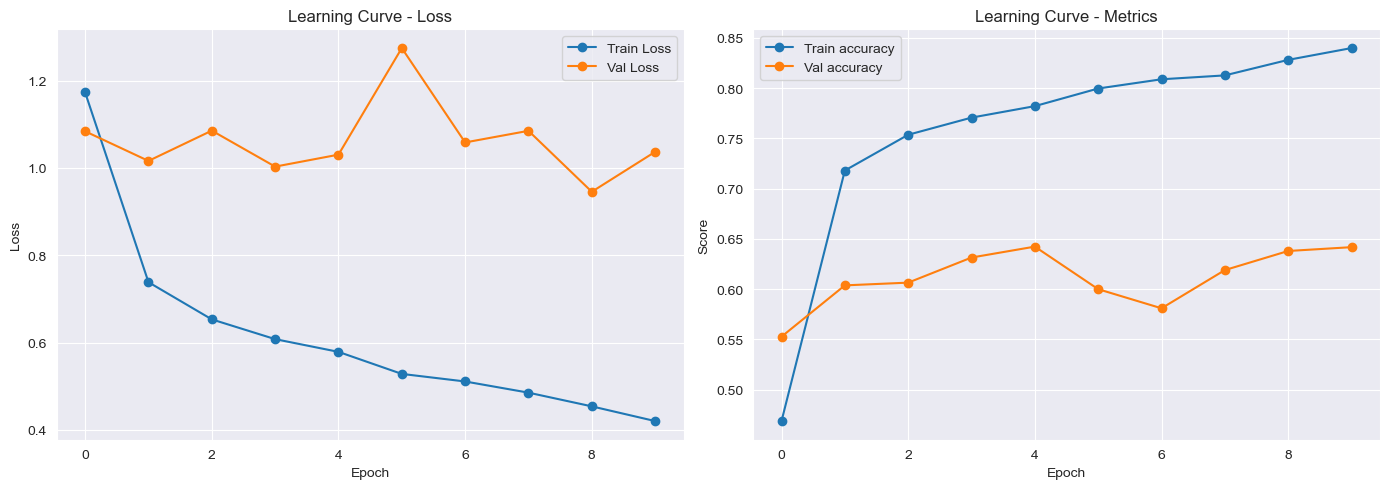

In [471]:
plot_learning_curve(base_model_cell, metrics=('accuracy',), title='Learning Curve')

Classification Report for the model:
              precision    recall  f1-score   support

           0       0.48      0.51      0.49       261
           1       0.52      0.81      0.63       432
           2       0.88      0.79      0.83       925
           3       0.30      0.09      0.14       221

    accuracy                           0.67      1839
   macro avg       0.55      0.55      0.52      1839
weighted avg       0.67      0.67      0.65      1839



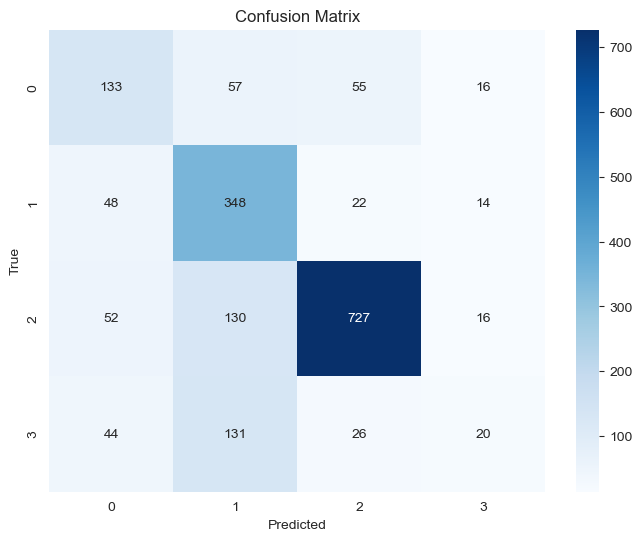

In [473]:
model_evaluation(test_gen_cell, model_VGG_1_Cell)

In [687]:

from tensorflow.keras.callbacks import EarlyStopping
reg_lambda = 0.001
num_of_classes = 2

early_stopping = EarlyStopping(
    monitor='val_loss',      
    patience=10,             
    restore_best_weights=True  
)

def lenet_model(n_classes, lambda_reg):
    model = tf.keras.Sequential(name="custom_grayscale_cnn")

    # Input layer: Convert RGB to grayscale (28x28x3 → 28x28x1)
    model.add(tf.keras.layers.Input(shape=(28, 28, 3), name="input_rgb"))
    model.add(tf.keras.layers.Lambda(lambda img: tf.expand_dims(img[:, :, :, 0], axis=-1),
                                     name="grayscale_conversion"))

    # Block 1: Conv + ReLU + Pool
    model.add(tf.keras.layers.Conv2D(
        32, (3, 3), padding='same',
        kernel_regularizer=tf.keras.regularizers.l2(lambda_reg),
        name="conv_layer1"))
    model.add(tf.keras.layers.Activation('relu', name="relu_1"))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), name="maxpool_1"))

    # Block 2: Conv + ReLU (no pooling here)
    model.add(tf.keras.layers.Conv2D(
        64, (3, 3), padding='same',
        kernel_regularizer=tf.keras.regularizers.l2(lambda_reg),
        name="conv_layer2"))
    model.add(tf.keras.layers.Activation('relu', name="relu_2"))

    # Block 3: Conv + ReLU + Pool
    model.add(tf.keras.layers.Conv2D(
        128, (3, 3), padding='same',
        kernel_regularizer=tf.keras.regularizers.l2(lambda_reg),
        name="conv_layer3"))
    model.add(tf.keras.layers.Activation('relu', name="relu_3"))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), name="maxpool_3"))

    # Flatten + Dense output
    model.add(tf.keras.layers.Flatten(name="flatten_output"))
    model.add(tf.keras.layers.Dense(
        n_classes, activation='softmax',
        kernel_regularizer=tf.keras.regularizers.l2(lambda_reg),
        name="final_dense"))

    # Loss function based on class count
    chosen_loss = 'binary_crossentropy' if n_classes == 2 else 'categorical_crossentropy'
    model.compile(optimizer='adam', loss=chosen_loss, metrics=['accuracy'])

    return model

In [689]:
class_weights = compute_class_weight(class_weight='balanced',
                                     classes=np.unique(train_data_cell['cellType']),
                                     y=train_data_cell['cellType'])

class_weight_dict = dict(zip(np.unique(train_data_cell['cellType']), class_weights))

In [705]:
reg_lambda = 0.001
num_of_classes = 4
model_cell_base = lenet_model(num_of_classes,reg_lambda)


#Adam = tf.keras.optimizers.Adam(learning_rate=0.01)
#model_cell_base.compile(optimizer=Adam,
#              loss='categorical_crossentropy',
#             metrics=['accuracy'])

sgd = tf.keras.optimizers.SGD(learning_rate=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model_cell_base.compile(optimizer=sgd,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Lenet_Model_1_Cell = model_cell_base.fit(train_gen_cell,
                                    validation_data = val_gen_cell,
                                    callbacks=[early_stopping],
                                    class_weight=class_weight_dict,
                                    epochs=100, verbose=1)

Epoch 1/100
195/195 ━━━━━━━━━━━━━━━━━━━━ 19s 86ms/step - accuracy: 0.3812 - loss: 1.4469 - val_accuracy: 0.4810 - val_loss: 1.3207
Epoch 2/100
195/195 ━━━━━━━━━━━━━━━━━━━━ 16s 83ms/step - accuracy: 0.6632 - loss: 1.0122 - val_accuracy: 0.5516 - val_loss: 1.2016
Epoch 3/100
195/195 ━━━━━━━━━━━━━━━━━━━━ 16s 84ms/step - accuracy: 0.6975 - loss: 0.8972 - val_accuracy: 0.5896 - val_loss: 1.0976
Epoch 4/100
195/195 ━━━━━━━━━━━━━━━━━━━━ 16s 82ms/step - accuracy: 0.7219 - loss: 0.8437 - val_accuracy: 0.5233 - val_loss: 1.3057
Epoch 5/100
195/195 ━━━━━━━━━━━━━━━━━━━━ 16s 83ms/step - accuracy: 0.7161 - loss: 0.8385 - val_accuracy: 0.5950 - val_loss: 1.1109
Epoch 6/100
195/195 ━━━━━━━━━━━━━━━━━━━━ 16s 80ms/step - accuracy: 0.7330 - loss: 0.8102 - val_accuracy: 0.5445 - val_loss: 1.3124
Epoch 7/100
195/195 ━━━━━━━━━━━━━━━━━━━━ 16s 83ms/step - accuracy: 0.7428 - loss: 0.7672 - val_accuracy: 0.5527 - val_loss: 1.2480
Epoch 8/100
195/195 ━━━━━━━━━━━━━━━━━━━━ 16s 82ms/step - accuracy: 0.7617 - loss: 0

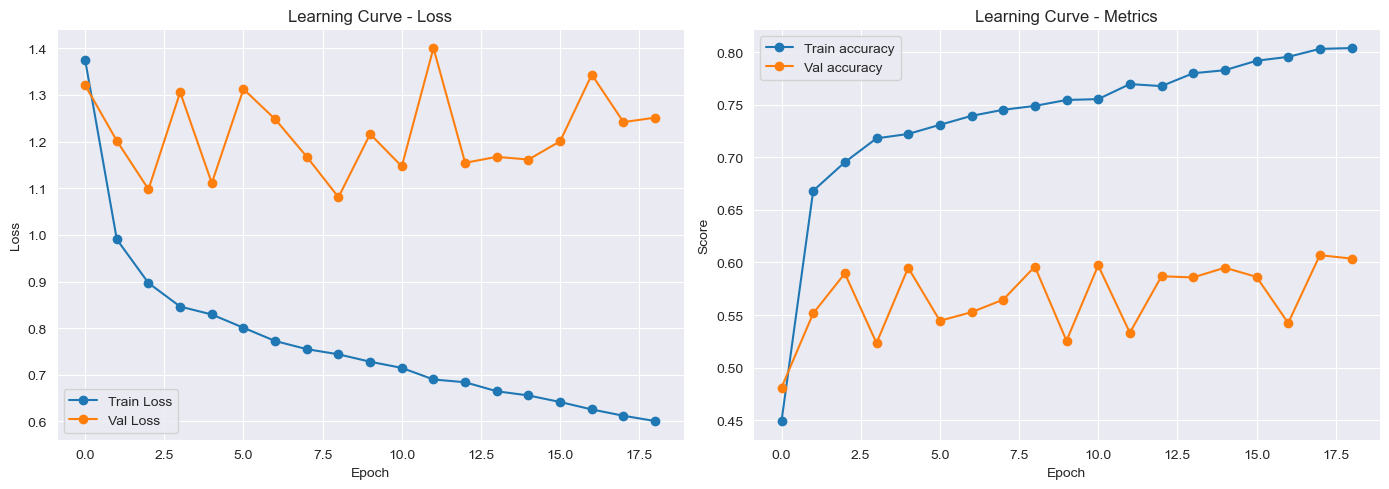

In [709]:
plot_learning_curve(Lenet_Model_1_Cell, metrics=('accuracy',), title='Learning Curve')

Classification Report for the model:
              precision    recall  f1-score   support

           0       0.48      0.60      0.53       261
           1       0.51      0.72      0.60       432
           2       0.91      0.75      0.82       925
           3       0.26      0.16      0.20       221

    accuracy                           0.65      1839
   macro avg       0.54      0.56      0.54      1839
weighted avg       0.68      0.65      0.65      1839



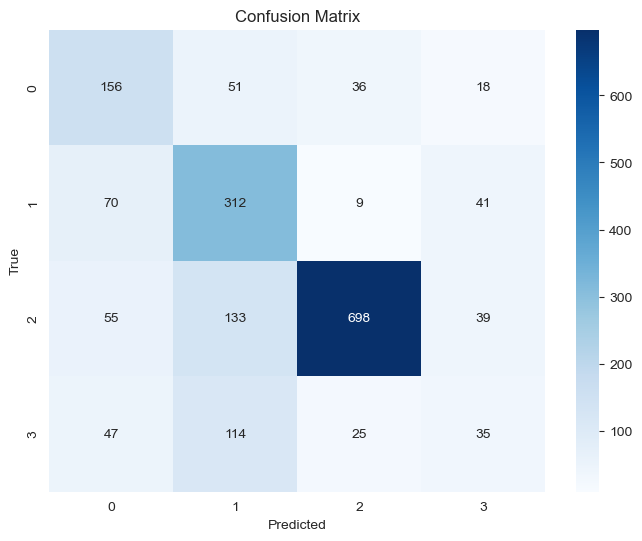

In [711]:
model_evaluation(test_gen_cell, model_cell_base)

> <span style="font-size:1em;">✔</span> **Observations:**

> - In VGG Model:
> - The  model achieved 67% overall accuracy on the 4-class cell classification task, which is moderate performance considering the complexity of the task.
> - The learning curves reveal clear signs of overfitting as training accuracy continuously increases to 84% by epoch 10 and Validation accuracy plateaus around 64% and remains unstable, fluctuating between epochs.
> - The loss curves shows the overfitting observations as well with training loss steadily decreases throughout training and Validation loss remains relatively high and unstable with significant spikes (especially at epoch 6).
> - We chose the VGG model for our cell classification task due to its superior overall accuracy (67% vs 65% with LeNet) and better performance metrics across key classes. 

### Fine Tuning Models - Cancer Detection

In [482]:
#Data Augmentation and Adding Regularization 



train_datagen_aug = ImageDataGenerator(rescale=1./255, data_format='channels_last',
                                       rotation_range=45, width_shift_range=0.2,height_shift_range=0.2, shear_range = 0.2,horizontal_flip=True,vertical_flip=True)

batch_size = 32

train_generator_aug = train_datagen_aug.flow_from_dataframe(
        dataframe=train_data_cancer,
        directory='patch_images/',
        x_col="ImageName",
        y_col="isCancerous",
        target_size=(28, 28),
        batch_size=batch_size,
        class_mode='categorical')

Found 12319 validated image filenames belonging to 2 classes.


In [492]:
OUTPUT_CLASSES_can=2
model_VGG_2_can = tf.keras.Sequential([
    
    #VGG block 1
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=INPUT_DIM),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    
    #VGG block 2
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),

    #VGG block 2
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(OUTPUT_CLASSES_can,activation='sigmoid')
])

In [494]:
model_VGG_2_can.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
              metrics=['accuracy'])

In [498]:
VGG2_model_can = model_VGG_2_can.fit(train_generator_aug, validation_data = val_gen_can, epochs=10, verbose=1)

Epoch 1/10
385/385 ━━━━━━━━━━━━━━━━━━━━ 53s 138ms/step - accuracy: 0.8187 - loss: 0.4149 - val_accuracy: 0.8310 - val_loss: 0.3642
Epoch 2/10
385/385 ━━━━━━━━━━━━━━━━━━━━ 52s 134ms/step - accuracy: 0.8480 - loss: 0.3621 - val_accuracy: 0.8072 - val_loss: 0.4266
Epoch 3/10
385/385 ━━━━━━━━━━━━━━━━━━━━ 51s 131ms/step - accuracy: 0.8566 - loss: 0.3407 - val_accuracy: 0.8000 - val_loss: 0.4450
Epoch 4/10
385/385 ━━━━━━━━━━━━━━━━━━━━ 52s 134ms/step - accuracy: 0.8674 - loss: 0.3269 - val_accuracy: 0.8407 - val_loss: 0.3710
Epoch 5/10
385/385 ━━━━━━━━━━━━━━━━━━━━ 52s 135ms/step - accuracy: 0.8711 - loss: 0.3088 - val_accuracy: 0.8537 - val_loss: 0.3460
Epoch 6/10
385/385 ━━━━━━━━━━━━━━━━━━━━ 53s 136ms/step - accuracy: 0.8678 - loss: 0.3143 - val_accuracy: 0.8412 - val_loss: 0.3559
Epoch 7/10
385/385 ━━━━━━━━━━━━━━━━━━━━ 51s 133ms/step - accuracy: 0.8691 - loss: 0.3116 - val_accuracy: 0.8677 - val_loss: 0.3133
Epoch 8/10
385/385 ━━━━━━━━━━━━━━━━━━━━ 52s 135ms/step - accuracy: 0.8753 - loss: 0

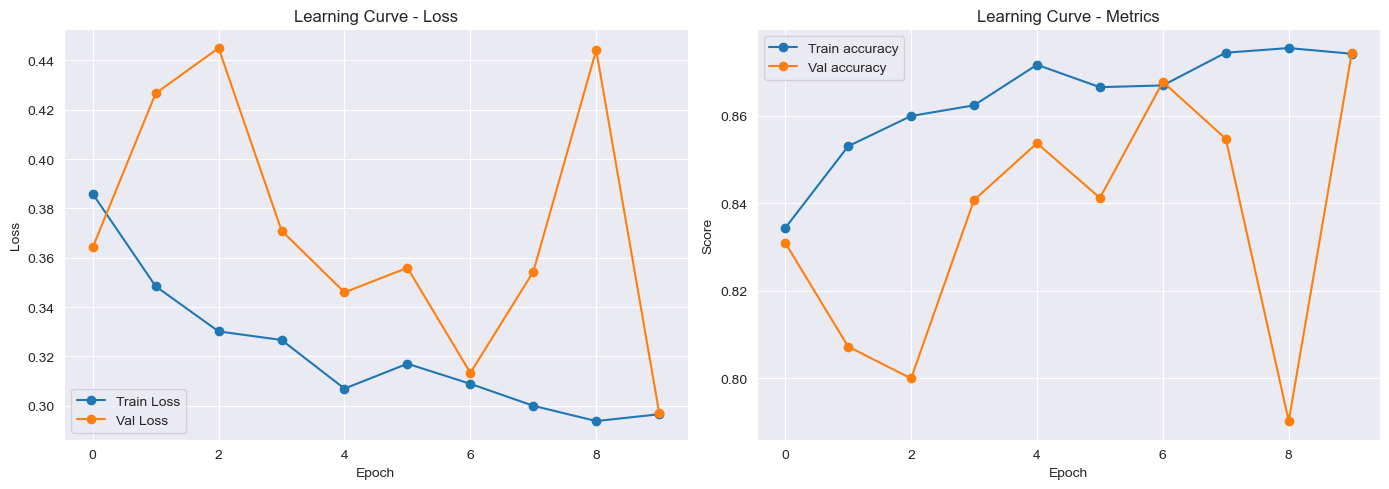

In [500]:
plot_learning_curve(VGG2_model_can, metrics=('accuracy',), title='Learning Curve')

Classification Report for the model:
              precision    recall  f1-score   support

           0       0.95      0.85      0.90      2909
           1       0.68      0.88      0.77      1047

    accuracy                           0.86      3956
   macro avg       0.82      0.87      0.83      3956
weighted avg       0.88      0.86      0.87      3956



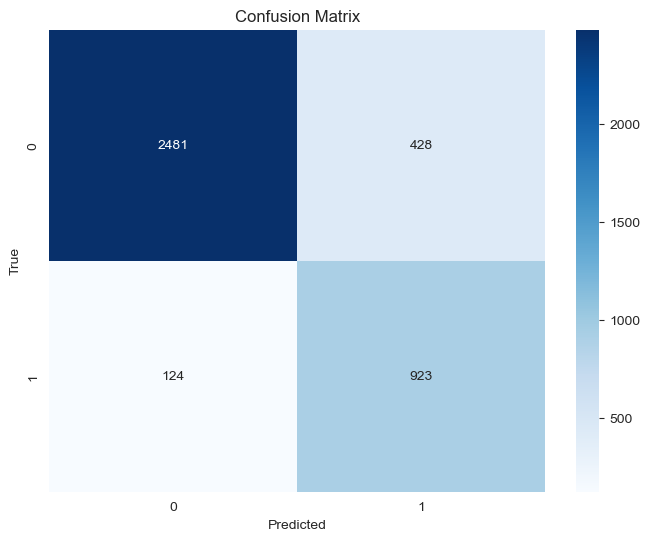

In [504]:
model_evaluation(test_gen_can, model_VGG_2)

> <span style="font-size:1em;">✔</span> **Observations:**

> - The fine-tuned VGG model achieved  overall performance with 86% accuracy on the cancer detection task, showing significant improvement over the cell classification model.
> - In learning curves, training accuracy steadily increases from 83% to 88% over the 10 epochs and Validation accuracy shows some fluctuation but generally improves, reaching its peak of 87.4% around last epoch. 
> - In the Loss curve, Both training and validation loss generally decrease over time while validation loss shows some spikes (particularly in epochs 2-3 and 9). While final validation loss is very close to training loss (0.30), suggesting minimal overfitting.
> - The model is biased toward predicting cancer (higher sensitivity), which may be desirable in a medical context where false negatives are more concerning than false positives
> -  The Data augmentation techniques such as rotation, shifting, flipping shows a less contrbiton to the model's improved generalization ability compared to the cell classification model.
> -  The model handles class imbalance well (2909 non-cancerous vs 1047 cancerous samples) with strong F1-scores for both classes with 90% and 77%.

### Applying Regularizations + Dropouts 

In [544]:
reg_lambda = 0.0001  # Reduced regularization
OUTPUT_CLASSES_can = 2  # For binary classification

model_VGG_3_can = tf.keras.Sequential([
    # VGG block 1
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same', 
                           kernel_regularizer=tf.keras.regularizers.l2(reg_lambda), input_shape=INPUT_DIM),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same', 
                           kernel_regularizer=tf.keras.regularizers.l2(reg_lambda)),
    tf.keras.layers.MaxPooling2D((2, 2)),

    # VGG block 2
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same', 
                           kernel_regularizer=tf.keras.regularizers.l2(reg_lambda)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same', 
                           kernel_regularizer=tf.keras.regularizers.l2(reg_lambda)),
    tf.keras.layers.MaxPooling2D((2, 2)),

    # VGG block 3
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same', 
                           kernel_regularizer=tf.keras.regularizers.l2(reg_lambda)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same', 
                           kernel_regularizer=tf.keras.regularizers.l2(reg_lambda)),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(128, activation='relu', 
                          kernel_regularizer=tf.keras.regularizers.l2(reg_lambda)),
    tf.keras.layers.Dropout(0.4),  # Increased
    tf.keras.layers.Dense(64, activation='relu', 
                          kernel_regularizer=tf.keras.regularizers.l2(reg_lambda)),
    tf.keras.layers.Dense(OUTPUT_CLASSES_can, activation='sigmoid')
])

In [546]:
model_VGG_3_can.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
              metrics=['accuracy'])

In [548]:
VGG3_model_can = model_VGG_3_can.fit(train_generator_aug, validation_data = val_gen_can, epochs=10, verbose=1)

Epoch 1/10
385/385 ━━━━━━━━━━━━━━━━━━━━ 59s 137ms/step - accuracy: 0.6952 - loss: 0.6926 - val_accuracy: 0.7401 - val_loss: 0.5753
Epoch 2/10
385/385 ━━━━━━━━━━━━━━━━━━━━ 52s 136ms/step - accuracy: 0.8176 - loss: 0.4432 - val_accuracy: 0.8137 - val_loss: 0.4127
Epoch 3/10
385/385 ━━━━━━━━━━━━━━━━━━━━ 52s 135ms/step - accuracy: 0.8427 - loss: 0.3990 - val_accuracy: 0.8357 - val_loss: 0.3853
Epoch 4/10
385/385 ━━━━━━━━━━━━━━━━━━━━ 51s 132ms/step - accuracy: 0.8384 - loss: 0.3957 - val_accuracy: 0.8270 - val_loss: 0.3880
Epoch 5/10
385/385 ━━━━━━━━━━━━━━━━━━━━ 52s 134ms/step - accuracy: 0.8420 - loss: 0.3839 - val_accuracy: 0.8372 - val_loss: 0.3771
Epoch 6/10
385/385 ━━━━━━━━━━━━━━━━━━━━ 51s 133ms/step - accuracy: 0.8462 - loss: 0.3790 - val_accuracy: 0.8210 - val_loss: 0.4160
Epoch 7/10
385/385 ━━━━━━━━━━━━━━━━━━━━ 51s 133ms/step - accuracy: 0.8526 - loss: 0.3718 - val_accuracy: 0.8537 - val_loss: 0.3543
Epoch 8/10
385/385 ━━━━━━━━━━━━━━━━━━━━ 51s 133ms/step - accuracy: 0.8531 - loss: 0

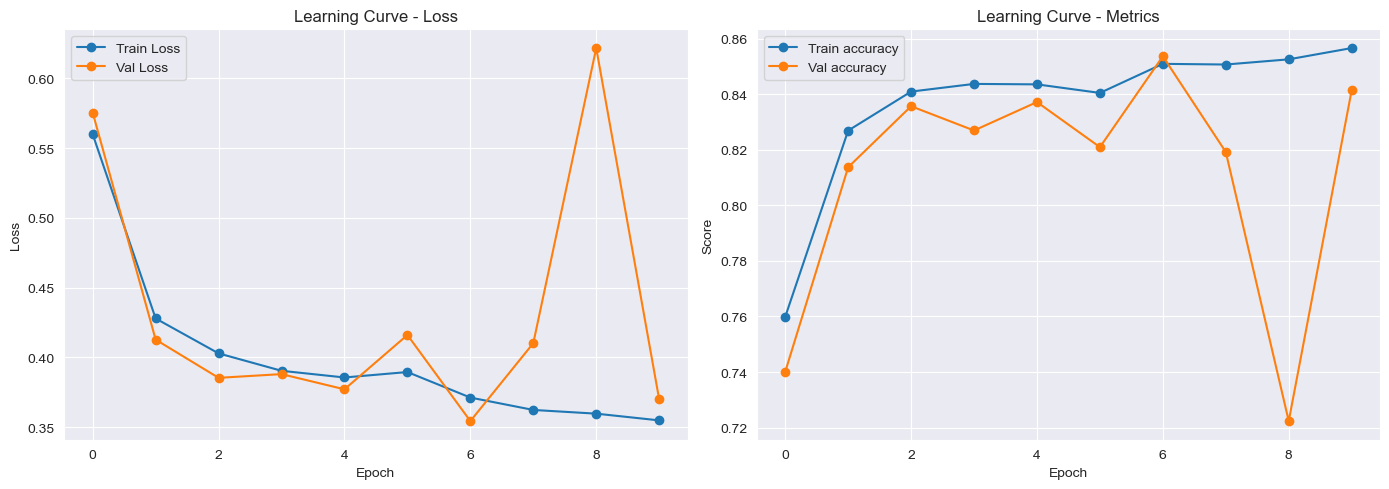

In [550]:
plot_learning_curve(VGG3_model_can, metrics=('accuracy',), title='Learning Curve')

Classification Report for the model:
              precision    recall  f1-score   support

           0       0.97      0.71      0.82      2909
           1       0.54      0.94      0.68      1047

    accuracy                           0.77      3956
   macro avg       0.75      0.82      0.75      3956
weighted avg       0.85      0.77      0.79      3956



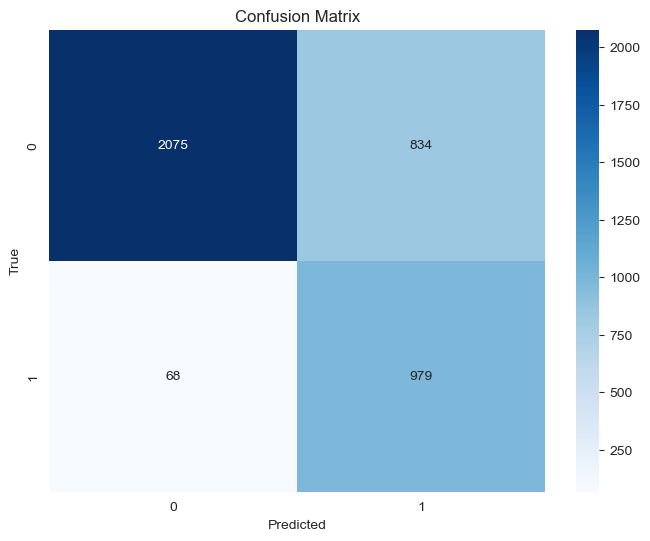

In [553]:
model_evaluation(test_gen_can, model_VGG_3_can)

> <span style="font-size:1em;">✔</span> **Observations:**

> - The regularized model with dropout achieved 77% overall accuracy on the cancer detection task, which is lower than the previous model'accuracy.
> - The learning curves shows observations of training accuracy increases steadily but plateaus around 85%, lower than the previous model, while Validation accuracy shows significant instability with multiple drops and recoveries as it can noticed a  drop occurs at epoch 9 (72.2% validation accuracy) before recovering in the final epoch.
> - In Loss curves, training loss decreases more gradually compared to the previous model and validation loss follows a similar pattern to validation accuracy with notable instabilitywith severe spike in validation loss appears at epoch 9.
> - The regularization techniques (L2 with lambda=0.0001 and 40% dropout) shows clear effect on the model's performnce as it  prevented overfitting with similar final training and validation loss while reduced overall model performance compared to the previous models.
> - The F1-scores reflect this performance shift as Non-cancerous class F1-score decreased from 0.90 to 0.82, Cancerous class F1-score decreased from 0.77 to 0.68 and overall weighted F1-score decreased too.

### Fine Tuning Models - Cell Type

In [667]:
batch_size = 32
INPUT_DIM = (28,28,3)
OUTPUT_CLASSES_cell = 4 # num of classes 
reg_lambda = 0.0005
#Applying Data Augmentation Techniques + Regularization + Dropout

train_datagen_aug_cell = ImageDataGenerator(
    rescale=1./255,
    rotation_range=25,             
    width_shift_range=0.15,       
    height_shift_range=0.15,
    shear_range=0.1,               
    zoom_range=0.2,               
    horizontal_flip=True,
    vertical_flip=True,           
    brightness_range=[0.8, 1.2],   
    fill_mode='nearest',
    data_format='channels_last'
)


batch_size = 32

train_generator_aug_cell = train_datagen_aug_cell.flow_from_dataframe(
        dataframe=train_data_cell,
        directory='patch_images/',
        x_col="ImageName",
        y_col="cellType",
        target_size=(28, 28),
        batch_size=batch_size,
        class_mode='categorical')

model_VGG_2_Cell = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same',
                           input_shape=INPUT_DIM, kernel_regularizer=tf.keras.regularizers.l2(reg_lambda)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same',
                           kernel_regularizer=tf.keras.regularizers.l2(reg_lambda)),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same',
                           kernel_regularizer=tf.keras.regularizers.l2(reg_lambda)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same',
                           kernel_regularizer=tf.keras.regularizers.l2(reg_lambda)),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same',
                           kernel_regularizer=tf.keras.regularizers.l2(reg_lambda)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same',
                           kernel_regularizer=tf.keras.regularizers.l2(reg_lambda)),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(reg_lambda)),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(reg_lambda)),
    tf.keras.layers.Dense(OUTPUT_CLASSES, activation='softmax')
])

Found 6215 validated image filenames belonging to 4 classes.


In [669]:
model_VGG_2_Cell.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

In [671]:
VGG2_model_cell = model_VGG_2_Cell.fit(train_generator_aug_cell, validation_data = val_gen_cell, epochs=10, verbose=1)


Epoch 1/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 37s 156ms/step - accuracy: 0.3659 - loss: 1.5282 - val_accuracy: 0.5396 - val_loss: 1.3654
Epoch 2/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 31s 157ms/step - accuracy: 0.5458 - loss: 1.1335 - val_accuracy: 0.6075 - val_loss: 1.1196
Epoch 3/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 30s 156ms/step - accuracy: 0.6890 - loss: 0.9197 - val_accuracy: 0.5016 - val_loss: 1.1268
Epoch 4/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 30s 151ms/step - accuracy: 0.7147 - loss: 0.8154 - val_accuracy: 0.5223 - val_loss: 1.1788
Epoch 5/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 30s 153ms/step - accuracy: 0.7370 - loss: 0.7492 - val_accuracy: 0.5961 - val_loss: 1.0230
Epoch 6/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 30s 152ms/step - accuracy: 0.7270 - loss: 0.7784 - val_accuracy: 0.5961 - val_loss: 1.0517
Epoch 7/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 29s 149ms/step - accuracy: 0.7433 - loss: 0.7026 - val_accuracy: 0.5608 - val_loss: 1.0999
Epoch 8/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 30s 152ms/step - accuracy: 0.7346 - loss: 0

In [715]:
model_VGG_2_Cell.save('model_VGG_2_Cell.h5')

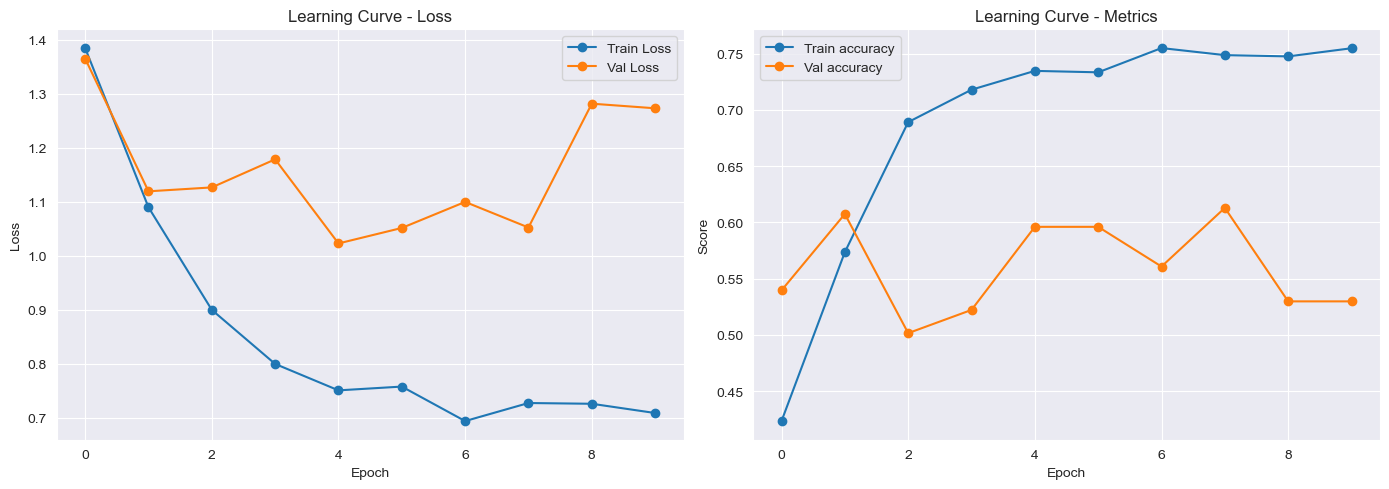

In [672]:
plot_learning_curve(VGG2_model_cell, metrics=('accuracy',), title='Learning Curve')

Classification Report for the model:
              precision    recall  f1-score   support

           0       0.48      0.45      0.46       261
           1       0.46      0.81      0.59       432
           2       0.89      0.79      0.84       925
           3       0.00      0.00      0.00       221

    accuracy                           0.65      1839
   macro avg       0.46      0.51      0.47      1839
weighted avg       0.62      0.65      0.63      1839



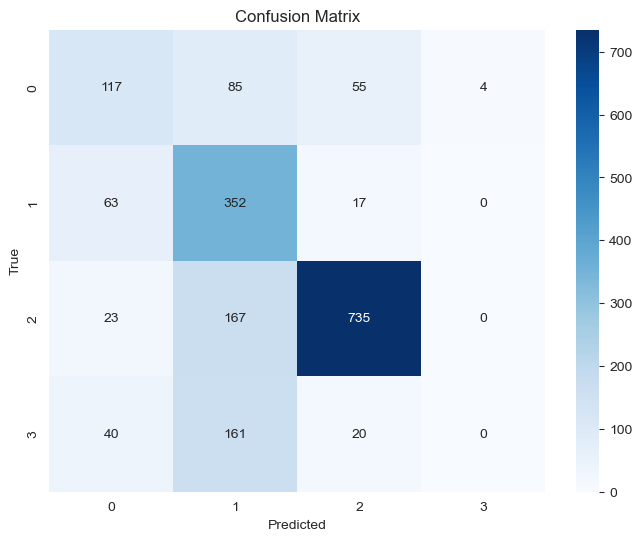

In [576]:
model_evaluation(test_gen_cell, model_VGG_2_Cell)

In [642]:
batch_size = 32
INPUT_DIM = (28,28,3)
OUTPUT_CLASSES_cell = 4 # num of classes 
reg_lambda = 0.0005

# Data Augmentation + Deep architecture
train_datagen_aug_cell = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.2,
    brightness_range=[0.75, 1.25],
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest',
    data_format='channels_last'
)

batch_size = 32

train_generator_aug_cell = train_datagen_aug_cell.flow_from_dataframe(
        dataframe=train_data_cell,
        directory='patch_images/',
        x_col="ImageName",
        y_col="cellType",
        target_size=(28, 28),
        batch_size=batch_size,
        class_mode='categorical')

model_VGG_3_Cell = tf.keras.Sequential([
    # VGG Block 1
    tf.keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu',
                           kernel_regularizer=tf.keras.regularizers.l2(reg_lambda), input_shape=INPUT_DIM),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu',
                           kernel_regularizer=tf.keras.regularizers.l2(reg_lambda)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2)),

    # VGG Block 2
    tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu',
                           kernel_regularizer=tf.keras.regularizers.l2(reg_lambda)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu',
                           kernel_regularizer=tf.keras.regularizers.l2(reg_lambda)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2)),

    # VGG Block 3
    tf.keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu',
                           kernel_regularizer=tf.keras.regularizers.l2(reg_lambda)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu',
                           kernel_regularizer=tf.keras.regularizers.l2(reg_lambda)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2)),

    # Replace Flatten with GAP
    tf.keras.layers.GlobalAveragePooling2D(),

    # Dense layers
    tf.keras.layers.Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(reg_lambda)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(reg_lambda)),
    tf.keras.layers.Dropout(0.4),

    # Output
    tf.keras.layers.Dense(OUTPUT_CLASSES_cell, activation='softmax')
])


Found 6215 validated image filenames belonging to 4 classes.


In [644]:
model_VGG_3_Cell.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

In [646]:
VGG3_model_cell = model_VGG_3_Cell.fit(train_generator_aug_cell, validation_data = val_gen_cell, epochs=10, verbose=1)


Epoch 1/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 58s 187ms/step - accuracy: 0.6224 - loss: 1.3162 - val_accuracy: 0.5147 - val_loss: 2.4245
Epoch 2/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 35s 179ms/step - accuracy: 0.7385 - loss: 1.0396 - val_accuracy: 0.5337 - val_loss: 1.9217
Epoch 3/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 35s 178ms/step - accuracy: 0.7541 - loss: 0.9740 - val_accuracy: 0.6238 - val_loss: 1.1959
Epoch 4/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 35s 182ms/step - accuracy: 0.7635 - loss: 0.9083 - val_accuracy: 0.6091 - val_loss: 1.3199
Epoch 5/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 35s 181ms/step - accuracy: 0.7690 - loss: 0.8939 - val_accuracy: 0.5603 - val_loss: 1.3515
Epoch 6/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 35s 181ms/step - accuracy: 0.7587 - loss: 0.8990 - val_accuracy: 0.6194 - val_loss: 1.4290
Epoch 7/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 36s 183ms/step - accuracy: 0.7795 - loss: 0.8386 - val_accuracy: 0.5896 - val_loss: 1.2832
Epoch 8/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 35s 179ms/step - accuracy: 0.7680 - loss: 0

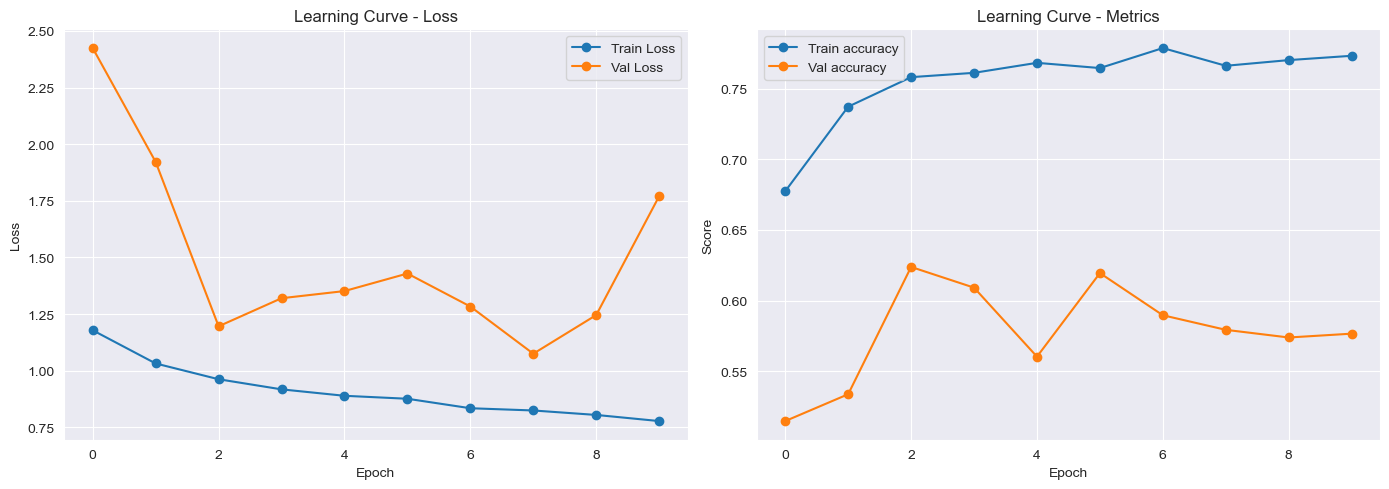

In [648]:
plot_learning_curve(VGG3_model_cell, metrics=('accuracy',), title='Learning Curve')

Classification Report for the model:
              precision    recall  f1-score   support

           0       0.52      0.35      0.42       261
           1       0.61      0.48      0.54       432
           2       0.68      0.97      0.80       925
           3       0.00      0.00      0.00       221

    accuracy                           0.65      1839
   macro avg       0.45      0.45      0.44      1839
weighted avg       0.56      0.65      0.59      1839



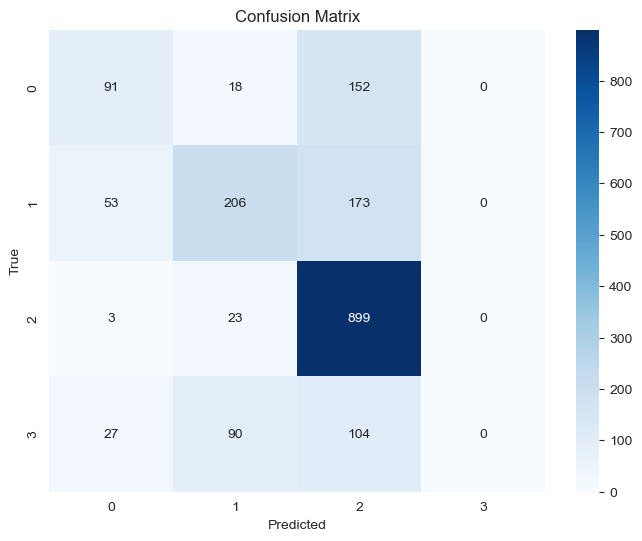

In [650]:
model_evaluation(test_gen_cell, model_VGG_3_Cell)

In [652]:
# Model  4-  Adding Class Weights + Deep Architecture
batch_size = 32
INPUT_DIM = (28,28,3)
OUTPUT_CLASSES_cell = 4 # num of classes 
reg_lambda = 0.0005

train_datagen_aug_cell = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.2,
    brightness_range=[0.75, 1.25],
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest',
    data_format='channels_last'
)

batch_size = 32

train_generator_aug_cell = train_datagen_aug_cell.flow_from_dataframe(
        dataframe=train_data_cell,
        directory='patch_images/',
        x_col="ImageName",
        y_col="cellType",
        target_size=(28, 28),
        batch_size=batch_size,
        class_mode='categorical')

model_VGG_4_Cell = tf.keras.Sequential([
    # VGG Block 1
    tf.keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu',
                           kernel_regularizer=tf.keras.regularizers.l2(reg_lambda), input_shape=INPUT_DIM),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu',
                           kernel_regularizer=tf.keras.regularizers.l2(reg_lambda)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2)),

    # VGG Block 2
    tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu',
                           kernel_regularizer=tf.keras.regularizers.l2(reg_lambda)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu',
                           kernel_regularizer=tf.keras.regularizers.l2(reg_lambda)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2)),

    # VGG Block 3
    tf.keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu',
                           kernel_regularizer=tf.keras.regularizers.l2(reg_lambda)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu',
                           kernel_regularizer=tf.keras.regularizers.l2(reg_lambda)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2)),

    # Replace Flatten with GAP
    tf.keras.layers.GlobalAveragePooling2D(),

    # Dense layers
    tf.keras.layers.Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(reg_lambda)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(reg_lambda)),
    tf.keras.layers.Dropout(0.4),

    # Output
    tf.keras.layers.Dense(OUTPUT_CLASSES_cell, activation='softmax')
])

from sklearn.utils import class_weight
import numpy as np

# Compute class weights
class_weights = compute_class_weight(class_weight='balanced',
                                     classes=np.unique(train_data_cell['cellType']),
                                     y=train_data_cell['cellType'])

#class_weight_dict = dict(zip(np.unique(train_data['cellType']), class_weights))

class_weights = dict(enumerate(class_weights))

Found 6215 validated image filenames belonging to 4 classes.


In [653]:
model_VGG_4_Cell.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

In [658]:
VGG4_model_cell = model_VGG_4_Cell.fit(train_generator_aug_cell, validation_data = val_gen_cell, epochs=10, verbose=1,class_weight=class_weights)


Epoch 1/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 48s 188ms/step - accuracy: 0.5533 - loss: 1.5434 - val_accuracy: 0.4772 - val_loss: 2.3987
Epoch 2/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 35s 179ms/step - accuracy: 0.6741 - loss: 1.2060 - val_accuracy: 0.4435 - val_loss: 1.6239
Epoch 3/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 35s 177ms/step - accuracy: 0.7317 - loss: 1.1138 - val_accuracy: 0.5299 - val_loss: 1.3634
Epoch 4/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 35s 179ms/step - accuracy: 0.7191 - loss: 1.1002 - val_accuracy: 0.5619 - val_loss: 1.3604
Epoch 5/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 36s 183ms/step - accuracy: 0.7411 - loss: 1.0413 - val_accuracy: 0.6596 - val_loss: 1.0904
Epoch 6/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 35s 181ms/step - accuracy: 0.7240 - loss: 1.0300 - val_accuracy: 0.6379 - val_loss: 1.3169
Epoch 7/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 36s 183ms/step - accuracy: 0.7354 - loss: 1.0218 - val_accuracy: 0.6401 - val_loss: 1.2568
Epoch 8/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 35s 180ms/step - accuracy: 0.7441 - loss: 0

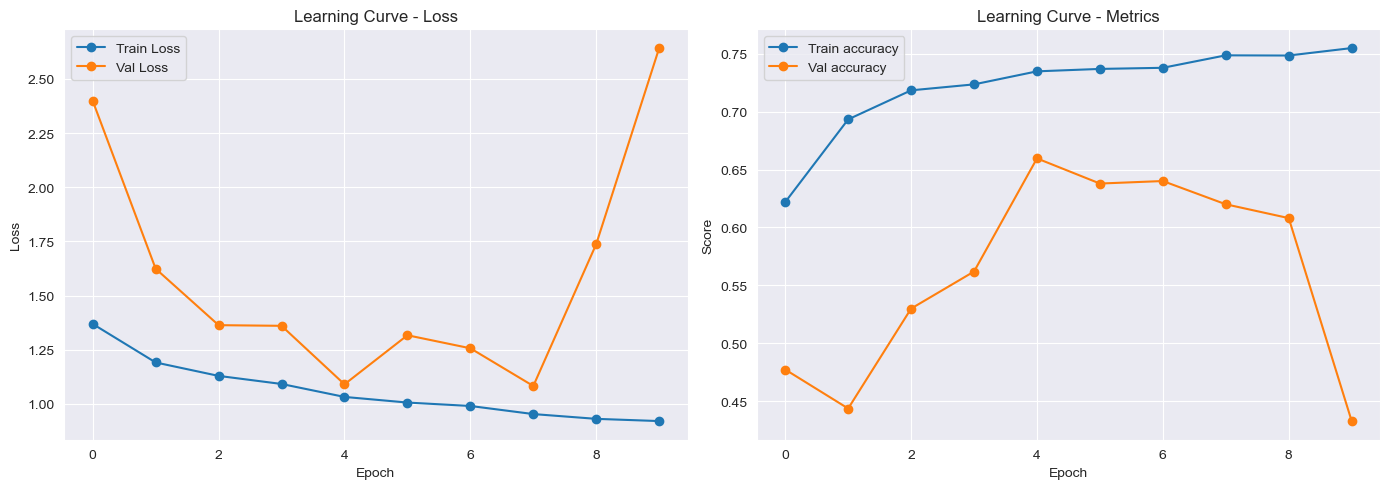

In [662]:
plot_learning_curve(VGG4_model_cell, metrics=('accuracy',), title='Learning Curve')

Classification Report for the model:
              precision    recall  f1-score   support

           0       0.05      0.08      0.06       261
           1       0.62      0.31      0.41       432
           2       0.99      0.20      0.33       925
           3       0.18      0.90      0.31       221

    accuracy                           0.29      1839
   macro avg       0.46      0.37      0.28      1839
weighted avg       0.67      0.29      0.31      1839



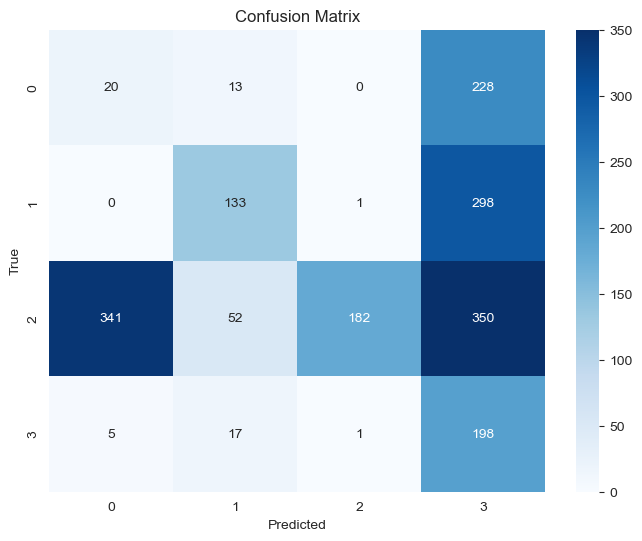

In [664]:
model_evaluation(test_gen_cell, model_VGG_4_Cell)

> <span style="font-size:1em;">✔</span> **Observations:**

> - The VGG-style architecture consistently delivered 65% accuracy (VGG2 and VGG3), confirming its effectiveness at extracting relevant features from cell images.
> - All fine-tuned models benefited from extensive data augmentation techniques which are rotation, zoom, brightness adjustments.
> - Adding class weights (VGG4) dramatically shifted performance, improving minority Class 3 recall to 90% but severely reducing overall accuracy to 29%.
> -  Adding BatchNormalization and GlobalAveragePooling (VGG3) improved training stability and reduced parameters while maintaining accuracy.

**For our final model for cellType classification we choose "VGG2"**

## Semi Supervised Learning

In [713]:
#generating extra dataset for prediction
extra_data_gen = ImageDataGenerator(rescale=1./255, data_format='channels_last')

extra_gen_cell = extra_data_gen.flow_from_dataframe(
        dataframe=extra_data,
        directory='./patch_images',
        x_col="ImageName",
        class_mode=None,
        target_size=(28, 28),
        shuffle=False

)

Found 10384 validated image filenames.


In [719]:
from tensorflow.keras.models import load_model
model_VGG_2_cell=load_model('model_VGG_2_Cell.h5')

In [721]:
y_pred_probs = model_VGG_2_cell.predict(extra_gen_cell, verbose=0)

y_pred = np.argmax(y_pred_probs, axis=1)

In [751]:
new_extra_data = extra_data.copy()
new_extra_data["cellType"] = y_pred
new_extra_data.head()

,InstanceID,patientID,ImageName,isCancerous,cellType
0,12681,61,12681.png,0,0
1,12682,61,12682.png,0,0
2,12683,61,12683.png,0,1
3,12684,61,12684.png,0,0
4,12685,61,12685.png,0,0


In [753]:
new_extra_data.describe()
#extra_data_new["cellType"] = extra_data_new["cellType"].astype(str)
new_extra_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10384 entries, 0 to 10383
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   InstanceID   10384 non-null  int64 
 1   patientID    10384 non-null  int64 
 2   ImageName    10384 non-null  object
 3   isCancerous  10384 non-null  int64 
 4   cellType     10384 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 405.8+ KB


In [755]:
extra_main_comb = pd.concat([main_data[["InstanceID","patientID","ImageName","isCancerous","cellType"]],new_extra_data[["InstanceID","patientID","ImageName","isCancerous","cellType"]]],ignore_index=True)
extra_main_comb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20280 entries, 0 to 20279
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   InstanceID   20280 non-null  int64 
 1   patientID    20280 non-null  int64 
 2   ImageName    20280 non-null  object
 3   isCancerous  20280 non-null  int64 
 4   cellType     20280 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 792.3+ KB


In [757]:
data_temp_comb, data_test_extra_comb = train_test_split(extra_main_comb, test_size=0.15, shuffle=True, random_state=42)

data_train_extra_comb, data_val_extra_comb = train_test_split(data_temp_comb, test_size=0.2, shuffle=True, random_state=42)

In [759]:
data_train_extra_comb['cellType'] = data_train_extra_comb['cellType'].astype('str')
data_val_extra_comb['cellType'] = data_val_extra_comb['cellType'].astype('str')
data_test_extra_comb ['cellType'] = data_test_extra_comb ['cellType'].astype('str')

In [761]:
train_data_generator = ImageDataGenerator(rescale=1./255, data_format='channels_last')
val_data_generator = ImageDataGenerator(rescale=1./255, data_format='channels_last')

batch_size = 32

train_generator_multi_extra = train_data_generator.flow_from_dataframe(
        dataframe=data_train_extra_comb,
        directory='./patch_images',
        x_col="ImageName",
        y_col="cellType",
        target_size=(28, 28),
        batch_size=batch_size,
        class_mode='categorical')

validation_generator_multi_extra = val_data_generator.flow_from_dataframe(
        dataframe=data_val_extra_comb,
        directory='./patch_images',
        x_col="ImageName",
        y_col="cellType",
        target_size=(28, 28),
        batch_size=batch_size,

        class_mode='categorical')

test_data_generator = ImageDataGenerator(rescale=1./255, data_format='channels_last')

test_generator_multi_extra = test_data_generator.flow_from_dataframe(
        dataframe=data_test_extra_comb,
        directory='./patch_images',
        x_col="ImageName",
        y_col="cellType",
        target_size=(28, 28),
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=False
)

Found 13790 validated image filenames belonging to 4 classes.
Found 3448 validated image filenames belonging to 4 classes.
Found 3042 validated image filenames belonging to 4 classes.


In [763]:
# Compute class weights
class_weights = compute_class_weight(class_weight='balanced',
                                     classes=np.unique(extra_main_comb['cellType']),
                                     y=extra_main_comb['cellType'])

class_weight_dict = dict(zip(np.unique(extra_main_comb['cellType']), class_weights))

In [ ]:
reg_lambda = 0.001
num_of_classes = 4
sgd = tf.keras.optimizers.SGD(learning_rate=0.01, decay=1e-6, momentum=0.9, nesterov=True)
improved_cnn_model_cellType = improved_cnn(num_of_classes,reg_lambda)
improved_cnn_model_cellType.compile(optimizer=sgd,
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

#model_VGG_2_Cell
history_deep_extra = improved_cnn_model_cellType.fit(train_generator_multi_extra,
                                    validation_data = validation_generator_multi_extra,
                                    callbacks=[early_stopping],
                                    class_weight=class_weight_dict,
                                    epochs=100, verbose=1)

In [767]:
batch_size = 32
INPUT_DIM = (28,28,3)
OUTPUT_CLASSES_cell = 4 # num of classes 
reg_lambda = 0.0005
#Applying Data Augmentation Techniques + Regularization + Dropout

train_datagen_aug_cell_new = ImageDataGenerator(
    rescale=1./255,
    rotation_range=25,             
    width_shift_range=0.15,       
    height_shift_range=0.15,
    shear_range=0.1,               
    zoom_range=0.2,               
    horizontal_flip=True,
    vertical_flip=True,           
    brightness_range=[0.8, 1.2],   
    fill_mode='nearest',
    data_format='channels_last'
)


batch_size = 32

train_generator_aug_cell_new = train_datagen_aug_cell_new.flow_from_dataframe(
        dataframe=data_train_extra_comb,
        directory='patch_images/',
        x_col="ImageName",
        y_col="cellType",
        target_size=(28, 28),
        batch_size=batch_size,
        class_mode='categorical')

Found 13790 validated image filenames belonging to 4 classes.


In [769]:
model_VGG_2_Cell.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

VGG2_model_cell = model_VGG_2_Cell.fit(train_generator_aug_cell_new, validation_data = validation_generator_multi_extra, epochs=10, verbose=1)

Epoch 1/10
431/431 ━━━━━━━━━━━━━━━━━━━━ 71s 150ms/step - accuracy: 0.7703 - loss: 0.6758 - val_accuracy: 0.7892 - val_loss: 0.6306
Epoch 2/10
431/431 ━━━━━━━━━━━━━━━━━━━━ 63s 147ms/step - accuracy: 0.7800 - loss: 0.6524 - val_accuracy: 0.8031 - val_loss: 0.6121
Epoch 3/10
431/431 ━━━━━━━━━━━━━━━━━━━━ 63s 145ms/step - accuracy: 0.7894 - loss: 0.6150 - val_accuracy: 0.7419 - val_loss: 0.7059
Epoch 4/10
431/431 ━━━━━━━━━━━━━━━━━━━━ 61s 141ms/step - accuracy: 0.7983 - loss: 0.5990 - val_accuracy: 0.7932 - val_loss: 0.6158
Epoch 5/10
431/431 ━━━━━━━━━━━━━━━━━━━━ 62s 143ms/step - accuracy: 0.7908 - loss: 0.6080 - val_accuracy: 0.8202 - val_loss: 0.5642
Epoch 6/10
431/431 ━━━━━━━━━━━━━━━━━━━━ 62s 145ms/step - accuracy: 0.7989 - loss: 0.6012 - val_accuracy: 0.8202 - val_loss: 0.5472
Epoch 7/10
431/431 ━━━━━━━━━━━━━━━━━━━━ 63s 146ms/step - accuracy: 0.7985 - loss: 0.5969 - val_accuracy: 0.8164 - val_loss: 0.5488
Epoch 8/10
431/431 ━━━━━━━━━━━━━━━━━━━━ 62s 145ms/step - accuracy: 0.8006 - loss: 0

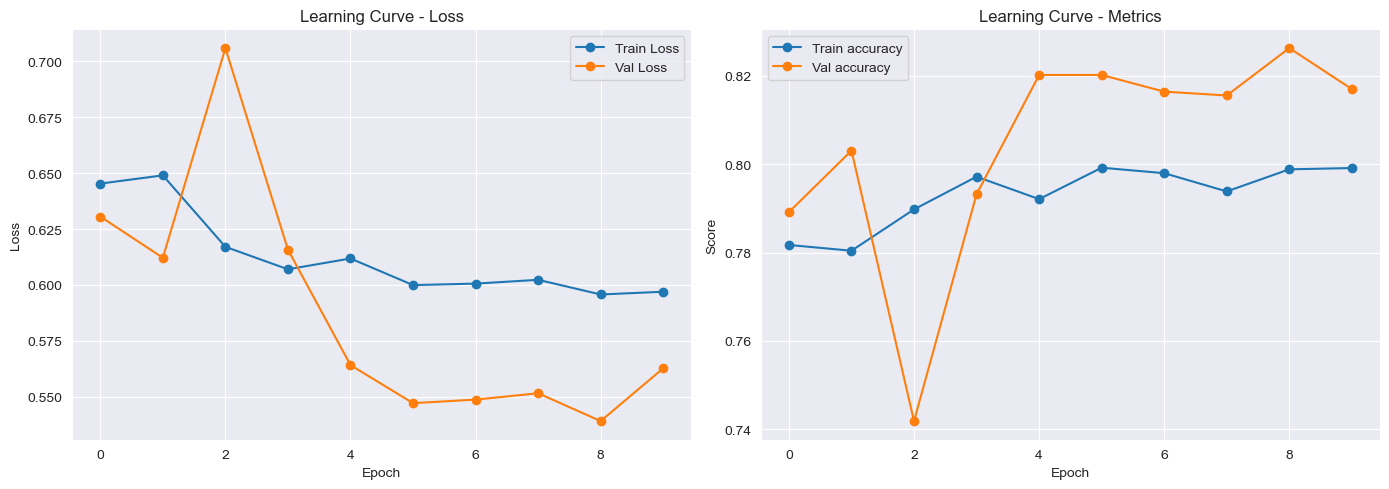

In [771]:
plot_learning_curve(VGG2_model_cell, metrics=('accuracy',), title='Learning Curve')

In [ ]:
model_evaluation(test_generator_multi_extra, improved_cnn_model_cellType)

Classification Report for the model:
              precision    recall  f1-score   support

           0       0.70      0.78      0.74       435
           1       0.79      0.92      0.85      1120
           2       0.92      0.89      0.90      1258
           3       0.85      0.19      0.31       229

    accuracy                           0.83      3042
   macro avg       0.81      0.69      0.70      3042
weighted avg       0.84      0.83      0.81      3042



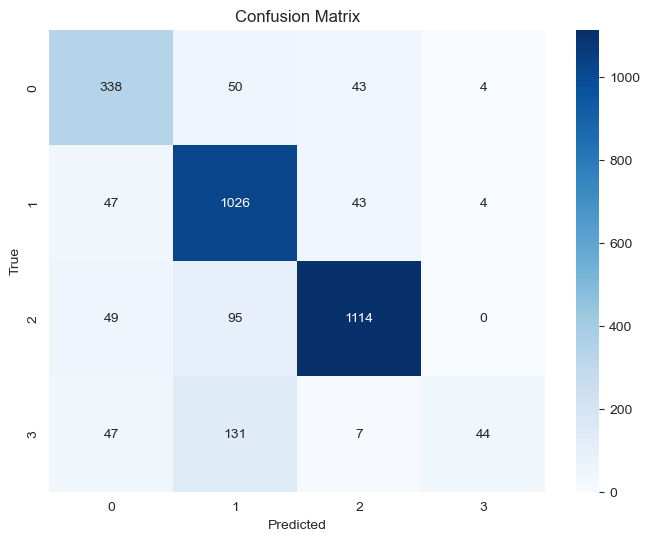

In [773]:
model_evaluation(test_generator_multi_extra, model_VGG_2_Cell)

In [ ]:
model_VGG_2_Cell.save('model_cellType_deep_extra.h5')

> <span style="font-size:1em;">✔</span> **Observations:**

> - The overall F1-score increased significantly from our initial models, with the weighted average F1-score reaching 0.81.
> - The balanced performance across most categories: Class 0 (F1=0.74), Class 1 (F1=0.85), and Class 2 (F1=0.90) all show strong F1-scores, indicating both high precision and recall.

### You can add any other analysis you want with justification here (adding code and markdown)